The Basic Hubbard plots are plots are programmed to match plots in J. Phys.: Condens. Matter 27 (2015) 393001
The Thermal Hubbard plots are programmed to match the plots in Phys rev B. 93 245131 (2016)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import basic_hub as hub
import HF_hub as HFhub
import KS_hub as KShub
import Thermal_Hubbard as Therm
import Thermal_KS_Hubbard as KS_Therm
from numpy.linalg import eigh
import scipy.optimize as optimize
from scipy.integrate import simps
import Near_U_hub as near
from scipy import interpolate
from tqdm import tqdm
from IPython.display import clear_output

In [2]:
plt.rcParams.update({'axes.labelsize':'xx-large'})
plt.rcParams.update({'axes.titlesize':'xx-large'})
plt.rcParams.update({'xtick.labelsize':'x-large'})
plt.rcParams.update({'ytick.labelsize':'x-large'})
plt.rcParams.update({'legend.fontsize':'x-large'})

# Hubbard Dimer

In [37]:
t = .5
Us = [.1,1,5,10]
tau = 10
target_dn = .2

lam1 = np.linspace(.001,1,800)
lam2 = np.linspace(1,4,801)
lam3 = np.linspace(4,16,2001)
lam4 = np.linspace(16,10000,20001)
lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])

ntaus = len(Us)

for i,U in enumerate(Us):
    if i==0:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
        Kc_mat = np.empty((len(Kcs),ntaus))
        ex_Kc_mat = np.empty((len(ex_Kcs),ntaus))
        
        all_Kc_mat = np.empty((len(all_Kcs),ntaus))
        
    else:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
    Kc_mat[:,i] = Kcs
    ex_Kc_mat[:,i] = ex_Kcs
    all_Kc_mat[:,i] = all_Kcs

31.622776601683793
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
1

In [38]:
data = {}
data['Us'] = Us
data['Kcs'] = Kc_mat
data['mus'] = plotmus
data['ex_Kcs'] = ex_Kc_mat
data['ex_plotmus'] = ex_mus
data['all_Kc'] = all_Kc_mat
data['all_mus'] = mus
np.save('upside_down_data/data_tau='+str(tau)+'_t='+str(t)+'_dn='+str(target_dn)+'.npy',data)

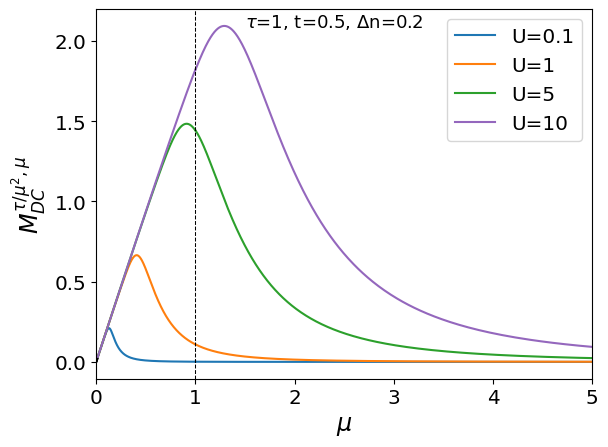

In [79]:
t = .5
Us = [.1,1,5,10]
tau = 1
target_dn = .2

colors = ['tab:blue','tab:orange','tab:green','tab:purple']

data = np.load('upside_down_data/data_tau='+str(tau)+'_t='+str(t)+'_dn='+str(target_dn)+'.npy',allow_pickle=True).item()

plotmus = data['mus']
ex_mus = data['ex_plotmus']
ex_Kc_mat = data['ex_Kcs']
Us = data['Us']
Kc_mat = data['Kcs']
all_Kc_mat = data['all_Kc']
mus = data['all_mus']

nACmus = len(plotmus)

for i,U in enumerate(Us):
    
    plt.plot(plotmus,Kc_mat[:,i],color=colors[i],label='U='+str(U))
    plt.plot(mus[nACmus:],all_Kc_mat[nACmus:,i],color=colors[i])
    if i == len(taus)-1:
        plt.plot(ex_mus,ex_Kc_mat[:,i],color='black')
    else:
        plt.plot(ex_mus,ex_Kc_mat[:,i],color='black')
plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$M^{\\tau/\mu^2,\mu}_{DC}$')
#plt.title('$M^{\\tau/\mu^2,\mu}_{DC}$ vs. $\mu$')
plt.annotate('$\\tau$='+str(tau)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.savefig('upside_down_images/upside_down_tau='+str(tau)+'_t='+str(t)+'_dn='+str(target_dn)+'.png',bbox_inches='tight')
plt.show()

In [53]:
t = .5
U = 1
tau = 1
target_dns = [.1,.2,.5,1]

lam1 = np.linspace(.001,1,800)
lam2 = np.linspace(1,4,801)
lam3 = np.linspace(4,16,2001)
lam4 = np.linspace(16,10000,20001)
lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])

ntaus = len(target_dns)

for i,target_dn in enumerate(target_dns):
    if i==0:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
        Kc_mat = np.empty((len(Kcs),ntaus))
        ex_Kc_mat = np.empty((len(ex_Kcs),ntaus))
        
        all_Kc_mat = np.empty((len(all_Kcs),ntaus))
        
    else:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
    Kc_mat[:,i] = Kcs
    ex_Kc_mat[:,i] = ex_Kcs
    all_Kc_mat[:,i] = all_Kcs

31.622776601683793
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
1

In [54]:
data = {}
data['target_dns'] = target_dns
data['Kcs'] = Kc_mat
data['mus'] = plotmus
data['ex_Kcs'] = ex_Kc_mat
data['ex_plotmus'] = ex_mus
data['all_Kc'] = all_Kc_mat
data['all_mus'] = mus
np.save('upside_down_data/data_tau='+str(tau)+'_t='+str(t)+'_U='+str(U)+'.npy',data)

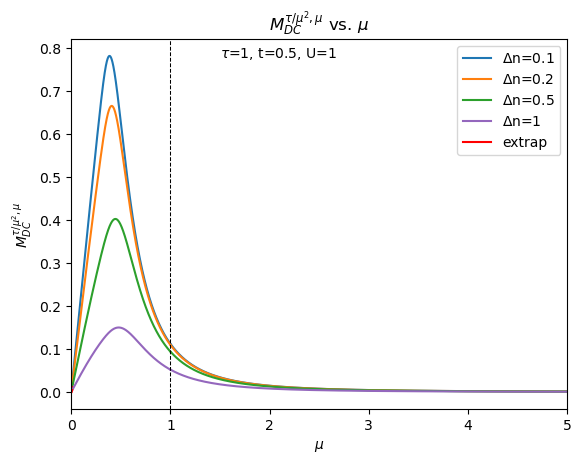

In [55]:
colors = ['tab:blue','tab:orange','tab:green','tab:purple']

data = np.load('upside_down_data/data_tau='+str(tau)+'_t='+str(t)+'_U='+str(U)+'.npy',allow_pickle=True).item()

plotmus = data['mus']
ex_mus = data['ex_plotmus']
ex_Kc_mat = data['ex_Kcs']
target_dns = data['target_dns']
Kc_mat = data['Kcs']
all_Kc_mat = data['all_Kc']
mus = data['all_mus']

nACmus = len(plotmus)

for i,target_dn in enumerate(target_dns):
    
    plt.plot(plotmus,Kc_mat[:,i],color=colors[i],label='$\Delta$n='+str(target_dn))
    plt.plot(mus[nACmus:],all_Kc_mat[nACmus:,i],color=colors[i])
    if i == len(taus)-1:
        plt.plot(ex_mus,ex_Kc_mat[:,i],color='red',label='extrap')
    else:
        plt.plot(ex_mus,ex_Kc_mat[:,i],color='red')
plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$M^{\\tau/\mu^2,\mu}_{DC}$')
plt.title('$M^{\\tau/\mu^2,\mu}_{DC}$ vs. $\mu$')
plt.annotate('$\\tau$='+str(tau)+', t='+str(t)+', U='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction')
plt.xlim((0,5))
plt.savefig('upside_down_images/upside_down_tau='+str(tau)+'_t='+str(t)+'_dn='+str(target_dn)+'.png')
plt.show()

## Basic figures

In [3]:
target_dn = 0
externaldv = 20
U = 100
t = .5
n1_op,n2_op = hub.hub_dens_ops()

func = hub.dn_search_func_gen(0,t,target_dn)
exactdvs = optimize.bisect(func,-10000000000000,100000000000000,xtol=2e-12)
#print('what the exact dvs should be:',exactdvs)
#print('exact dvxc:',exactdvs-externaldv)
#print()

val, vec = hub.hub_2site(0,t,exactdvs)
    
n1 = np.dot(vec,np.dot(n1_op,vec))
n2 = np.dot(vec,np.dot(n2_op,vec))
#print('calc dn:',n2-n1)
#print()


conv = 10
iters = 0

dn = 0

while conv > .001:
    
    dvs = hub.dvs(externaldv,dn,U)
    #print('calc dvs:',dvs)
    #print('calc vxc:',dvs-externaldv)
    
    val, vec = hub.hub_2site(0,t,dvs)
    
    n1 = np.dot(vec,np.dot(n1_op,vec))
    n2 = np.dot(vec,np.dot(n2_op,vec))
    #print('calc dn:',n2-n1)
    
    #print()
    
    dn = n2-n1
    
    iters+=1
    if iters > 100:
        break

1.5096309604660352


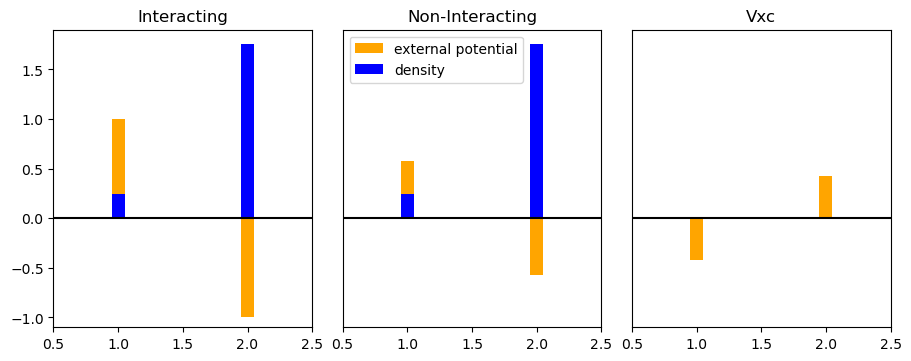

In [4]:
externaldv = 2
U = 1
t = .5
n1_op,n2_op = hub.hub_dens_ops()

groundval,groundvec = hub.hub_2site(U,t,externaldv)

groundn1 = np.dot(groundvec,np.dot(n1_op,groundvec))
groundn2 = np.dot(groundvec,np.dot(n2_op,groundvec))

target_dn = groundn2-groundn1

func = hub.dn_search_func_gen(0,t,target_dn)
exactdvs = optimize.bisect(func,-100,100,xtol=2e-12)
#print('what the exact dvs should be:',exactdvs)
#print('exact dvxc:',exactdvs-externaldv)
#print()

val, vec = hub.hub_2site(0,t,exactdvs)
    
n1 = np.dot(vec,np.dot(n1_op,vec))
n2 = np.dot(vec,np.dot(n2_op,vec))

print(n2-n1)

x = np.array([1,2])
ns = np.array([n1,n2])
vs = np.array([externaldv/2,-externaldv/2])
vss = np.array([exactdvs/2,-exactdvs/2])

fig, axs = plt.subplots(1,3,figsize=(9,3.5),layout='constrained')


axs[0].bar(x,vs,width=.1,label='external potential',color='orange')
axs[0].bar(x,ns,width=.1,label='density',color='blue')
axs[0].plot([-1,4],[0,0],color='black')
axs[0].set_xlim((.5,2.5))
axs[0].set_ylim((-1.1,1.9))
axs[0].set_title('Interacting')

axs[1].bar(x,vss,width=.1,label='external potential',color='orange')
axs[1].bar(x,ns,width=.1,label='density',color='blue')
axs[1].plot([-1,4],[0,0],color='black')
axs[1].set_xlim((.5,2.5))
axs[1].set_ylim((-1.1,1.9))
axs[1].set_yticks([])
axs[1].set_title('Non-Interacting')
axs[1].legend()

axs[2].bar(x,vss-vs,width=.1,color='orange')
axs[2].plot([-1,4],[0,0],color='black')
axs[2].set_xlim((.5,2.5))
axs[2].set_ylim((-1.1,1.9))
axs[2].set_title('Vxc')
axs[2].set_yticks([])

plt.savefig('Hubbard Example U1 t.5 dv2.png')
plt.show()

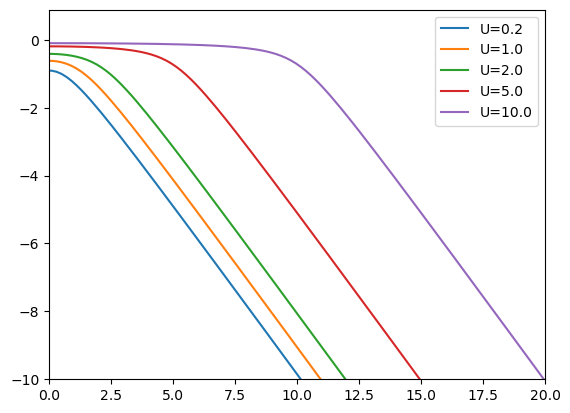

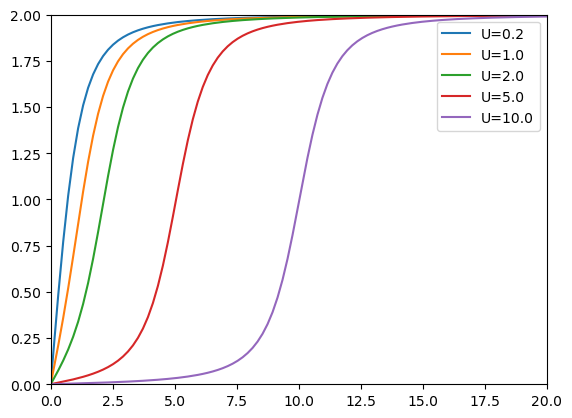

In [5]:
dvs = np.linspace(-20,20,200)
Us = np.array([.2,1,2,5,10])

ndv = len(dvs)
nU = len(Us)

[eigs,vecs] = hub.hub_2site_Udv(Us,1/2,dvs)

for i,U in enumerate(Us):
    plt.plot(dvs,eigs[:,i],label='U='+str(U))
plt.ylim(bottom=-10)
plt.xlim((0,20))
plt.legend()
plt.show()

[n1,n2] = hub.hub_dens_ops()
occ1_nums = np.empty((ndv,nU))
occ2_nums = np.empty((ndv,nU))

for i in range(nU):
    for j in range(ndv):
        occ1_nums[j,i] = np.dot(vecs[i,:,j],np.dot(n1,vecs[i,:,j]))
        occ2_nums[j,i] = np.dot(vecs[i,:,j],np.dot(n2,vecs[i,:,j]))
    plt.plot(dvs,occ2_nums[:,i]-occ1_nums[:,i],label='U='+str(Us[i]))
plt.xlim(0,20)
plt.ylim(0,2)
plt.legend()
plt.show()

## Fig 7

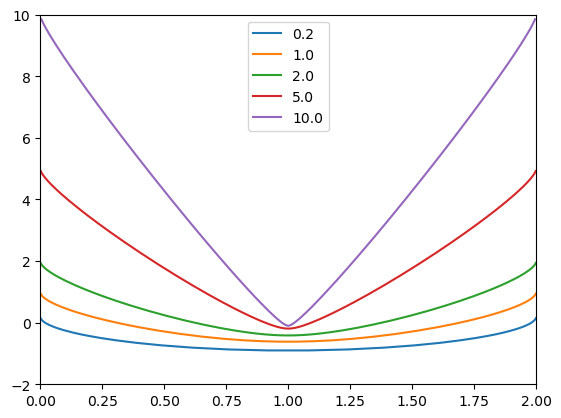

In [6]:
Vs = np.empty((ndv,nU))

for i in range(nU):
    for j,dv in enumerate(dvs):
        v = hub.hub_pot_operator(dv)
        Vs[j,i] = np.dot(vecs[i,:,j],np.dot(v,vecs[i,:,j]))

F = eigs-Vs

for i in range(nU):
    plt.plot(occ1_nums[:,i],F[:,i],label=Us[i])
plt.xlim(0,2)
plt.ylim(-2,10)
plt.legend()
plt.show()

## Fig 8

can't calculate these from eigenvectors?

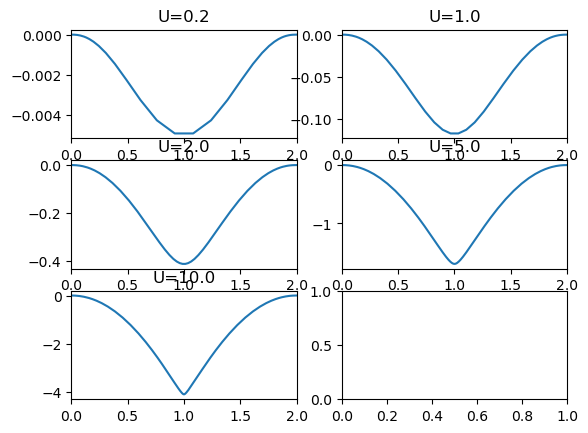

In [7]:
Us = np.array([.2,1,2,5,10])
Nu = len(Us)

Vees = np.empty((ndv,nU))
Ecs = np.empty((ndv,nU))
diff = np.empty(ndv)
fig, axs = plt.subplots(3,2)

Ts = hub.hub_non_int_kin_operator(.5)

r = 0
c = 0
for i,U in enumerate(Us):
    if c == 2:
        r += 1
        c = 0
    for j,dv in enumerate(dvs):
        
        val_T = Ts(vecs[i,:,j])
        
        test_val_T = hub.Ts(occ1_nums[j,i])
        
        VHX = hub.hub_EHX_operator(U)

        val_EHX = np.dot(vecs[i,:,j],np.dot(VHX,vecs[i,:,j]))

        test_val_EHX = hub.E_HX(occ1_nums[j,i],U)

        Ecs[j,i] = F[j,i] - test_val_EHX - test_val_T

    axs[r,c].plot(occ1_nums[:,i],Ecs[:,i],label='U='+str(U))
    axs[r,c].set_title('U='+str(U))
    axs[r,c].set_xlim(0,2)
    c += 1
plt.show()

## Fig 21

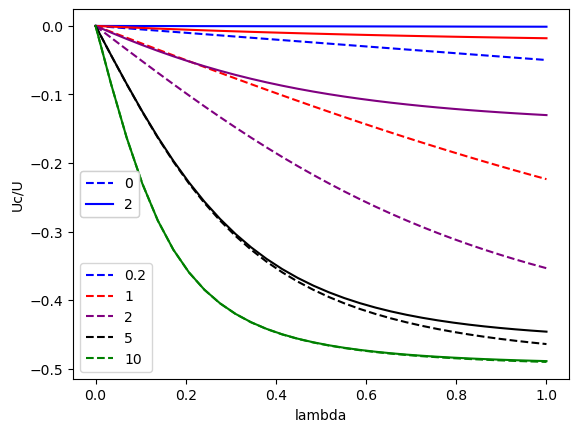

In [8]:
t = .5
Us = [.2,1,2,5,10]
dvs = [0,2]
lams = np.linspace(0.00001,1,30)
    
Ucs = hub.hub_Uc_lams_Us_dvs_overU(t,lams,Us,dvs)

colors = ['blue','red','purple','black','green']
linestyles = ['--','-']
all_lines = []
for i,v in enumerate(dvs):
    lines = []
    for j,U in enumerate(Us):
        l, = plt.plot(lams,Ucs[i,:,j],color=colors[j],linestyle=linestyles[i])
        lines.append(l)
    all_lines.append(lines)

legend1 = plt.legend(all_lines[0],Us,loc='lower left')
plt.gca().add_artist(legend1)
legend2 = plt.legend([l[0] for l in all_lines],dvs,loc=6)
plt.gca().add_artist(legend2)
plt.xlabel('$lambda$')
plt.ylabel('Uc/U')
plt.show()

# Thermal Hubbard Dimer

## Fig 1 exact 

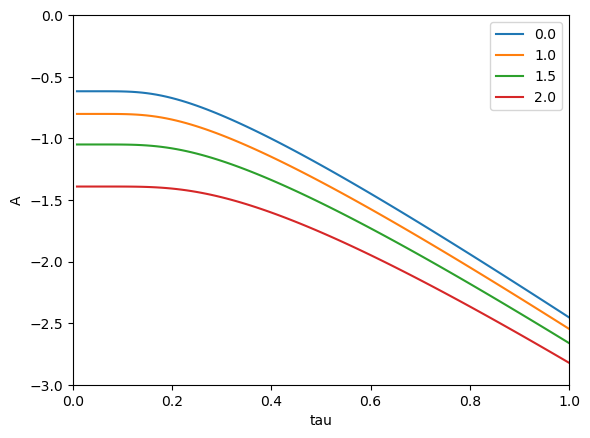

In [9]:
U = 1
t = 1/2
dvs = np.array([0,1,1.5,2])
taus = np.linspace(.008,1,100)
Zgs,Oms,As = Therm.Thermal_2particle_Hubbard_dvs(U,t,dvs,taus)
for i,dv in enumerate(dvs):
    plt.plot(taus,As[:,i],label=dv)
plt.xlim(0,1)
plt.ylim(-3,0)
plt.xlabel('tau')
plt.ylabel('A')
plt.legend()
plt.show()

## Fig 2

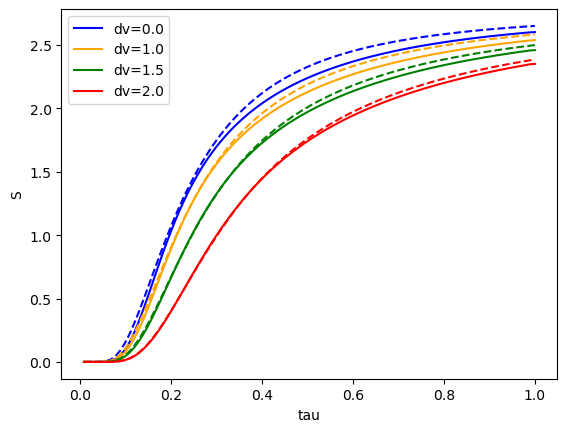

In [10]:
U = 1
t = 1/2
dvs = np.array([0,1,1.5,2])
taus = np.linspace(.008,1,100)

Zgs,Oms,As = Therm.Thermal_2particle_Hubbard_dvs(U,t,dvs,taus)

colors = ['blue','orange','green','red']

delta_ns = Therm.Thermal_2particle_Hubbard_deltan_dvs(U,t,dvs,taus)

delta_vks = np.empty((len(taus),len(dvs)))

for i in range(len(dvs)):
    delta_vks[:,i] = KS_Therm.find_dvks(.5,taus,delta_ns[:,i])
    Ss = KS_Therm.entropy(delta_vks[:,i],t,taus)
    plt.plot(taus,Ss,linestyle='--',color=colors[i])
    plt.plot(taus,-np.gradient(Oms[:,i],taus),label='dv='+str(dvs[i]),color=colors[i])
plt.xlabel('tau')
plt.ylabel('S')
plt.legend()
plt.show()

## Fig 3 exact

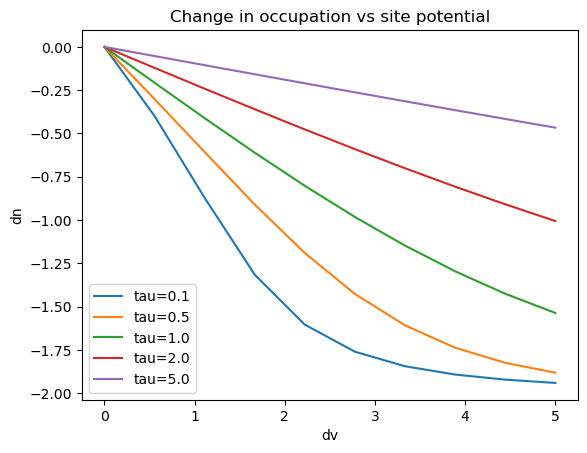

In [11]:
U = 1
t = 1/2
dvs = np.linspace(0,5,10)
v1s = dvs/2
taus = np.array([.1,.5,1,2,5])
delta_n = Therm.Thermal_2particle_Hubbard_deltan_dvs(U,t,dvs,taus)
for i,tau in enumerate(taus):
    plt.plot(dvs,delta_n[i,:],label='tau='+str(tau))
plt.legend()
plt.xlabel('dv')
plt.ylabel('dn')
plt.title('Change in occupation vs site potential')
plt.savefig('Thermal interacting hubbard dimer.png')
plt.show()

v1 is dv/2 and v2 is -dv/2. Then dn is defined as n1-n2. For dn to be negative means that the occupation
is moving towards site two. This plot makes sense because as dv increases v1 increases pushing occupation to 
sit two. flipping the plot returns the exact plot in the paper. I think there was a mis labeling of dn or dv somewhere.

## Fig 4

In [300]:
ttaus = [.08,.5,1,2,4]
taulist = np.array([])
dtau = 1e-4
steps = np.arange(7)
nsteps = np.flip(steps)
tauis = np.array([])

for i,tau in enumerate(ttaus):
    for j in nsteps:
        taulist = np.append(taulist,tau-j*dtau)
        if j == 6:
            tauis = np.append(tauis,j*(i+1)+(i*7))
    for j in steps[1:]:
        taulist = np.append(taulist,tau+j*dtau)
        
tauis = tauis.astype(int)

In [304]:
U = 10
t = 1/2
dvs = np.linspace(-40,10,300)
#taus = np.array([.1,.5,1,2,4])
taus = taulist
ntau = len(taus)
ndv = len(dvs)

Zgs,Oms,As = Therm.Thermal_2particle_Hubbard_dvs(U,t,dvs,taus)

delta_ns = Therm.Thermal_2particle_Hubbard_deltan_dvs(U,t,dvs,taus)

delta_vks = np.empty((len(taus),len(dvs)))

S = np.empty((ntau,ndv))
Ss = np.empty((ntau,ndv))

for i in range(len(dvs)):
    delta_vks[:,i] = KS_Therm.find_dvks(.5,taus,delta_ns[:,i])
    Ss[:,i] = KS_Therm.entropy(delta_vks[:,i],t,taus)
    S[:,i] = -np.gradient(Oms[:,i],taus)

Vee = Therm.Thermal_2particle_Hubbard_interaction_dvs(U,t,dvs,taus)
EHX = KS_Therm.UHX(U,delta_ns)
Ttau = Therm.Thermal_2particle_Hubbard_kinetic_dvs(U,t,dvs,taus)

Ttaus = np.empty(delta_vks.shape)
for i in range(ntau):
    Ttaus[i,:] = KS_Therm.Ts(t,taus[i],delta_vks[i,:])

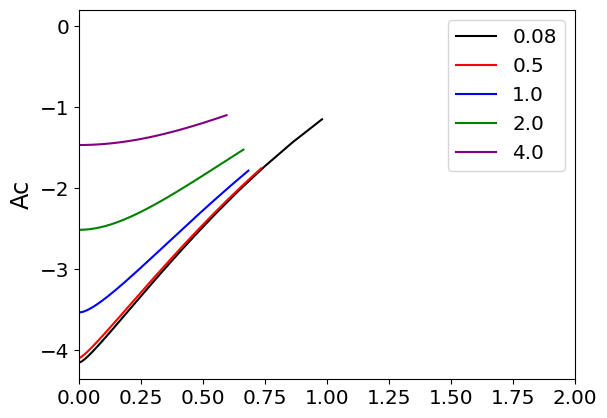

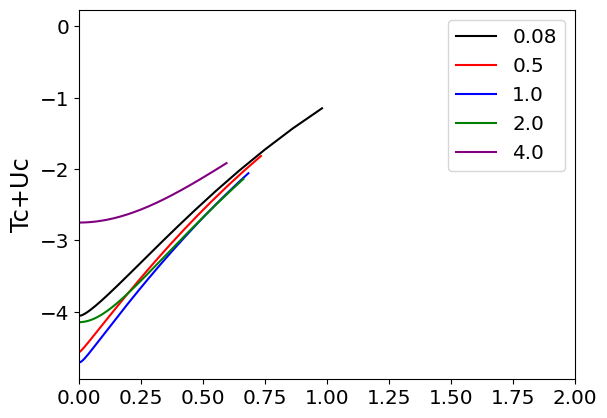

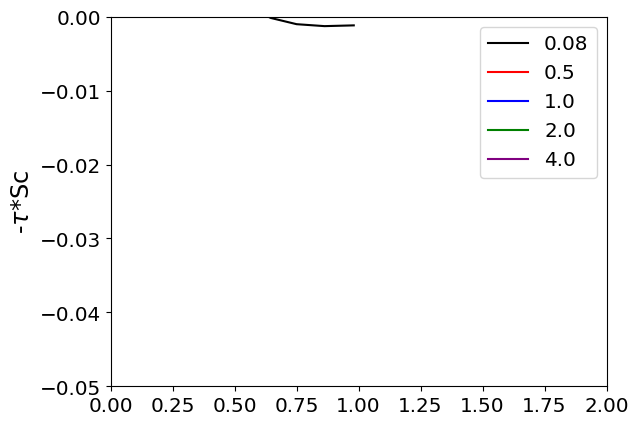

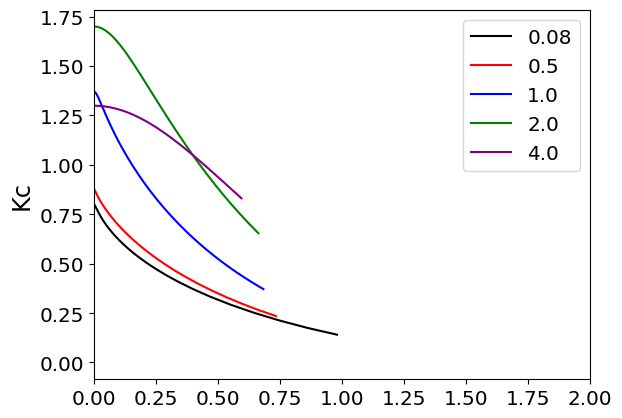

In [305]:
#iss = [0,int(ntau/8),int(ntau/4),int(ntau/2),ntau-1]
colors = ['black','red','blue','green','purple']

j=0
for i in tauis:
    plt.plot(delta_ns[i,:],(Ttau[i,:]-Ttaus[i,:])+(Vee[i,:]-EHX[i,:])-taus[i]*(S[i,:]-Ss[i,:]),label=taus[i],color=colors[j])
    j+=1
plt.legend()
plt.xlim(0,2)
plt.ylabel('Ac')
plt.show()

j=0
for i in tauis:
    plt.plot(delta_ns[i,:],(Ttau[i,:]-Ttaus[i,:])+(Vee[i,:]-EHX[i,:]),label=taus[i],color=colors[j])
    j+=1
plt.legend()
plt.xlim(0,2)
plt.ylabel('Tc+Uc')
plt.show()

j=0
for i in tauis:
    plt.plot(delta_ns[i,:],taus[i]*(S[i,:]-Ss[i,:]),label=taus[i],color=colors[j])
    j+=1
plt.legend()
plt.xlim(0,2)
plt.ylabel('-$\\tau$*Sc')
plt.ylim(-.05,0)
plt.show()

j=0
for i in tauis:
    plt.plot(delta_ns[i,:],(Ttau[i,:]-Ttaus[i,:])-taus[i]*(S[i,:]-Ss[i,:]),label=taus[i],color=colors[j])
    j+=1
plt.legend()
plt.xlim(0,2)
plt.ylabel('Kc')
plt.show()

# Fig 6

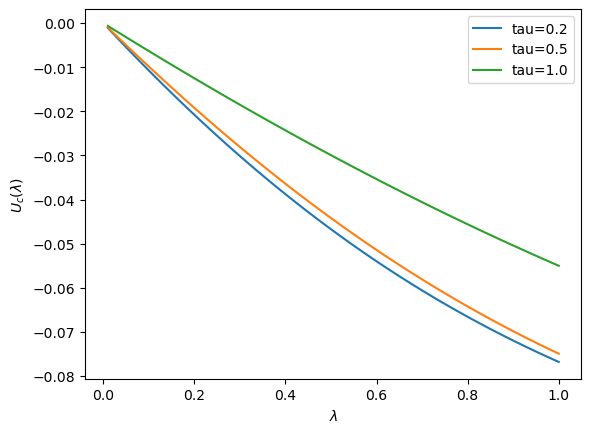

-0.04193140743264138

In [2]:
thermal_lams = np.linspace(0.01,1,100)
taus = np.array([.2,.5,1])
Ucs = np.empty((len(taus),len(thermal_lams)))
U = 1
t = .5
target_dn = 1
EHX = (U/2)*(1+(target_dn/2)**2)

for i, tau in enumerate(taus):
    dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))
    for j, lam in enumerate(thermal_lams):
        Ucs[i,j],dv_guess = Therm.Thermal_hub_Uc(t,lam,U,tau,target_dn,EHX,dv_guess)
        
for i in range(len(taus)):
    plt.plot(thermal_lams,Ucs[i,:],label='tau='+str(taus[i]))
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel("$U_c(\lambda)$")
plt.show()

simps(Ucs[1,:],thermal_lams)

# Upside Down Adiabatic testing

Tc= 0.0012141483541003861

non-interacting kinetic:  -0.99498743710662
last value in the Tvec:  -0.9937732887525196


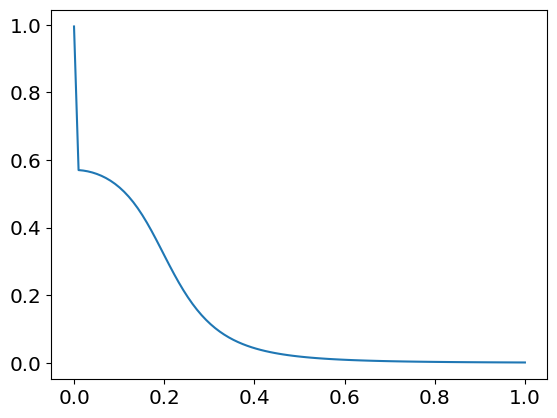

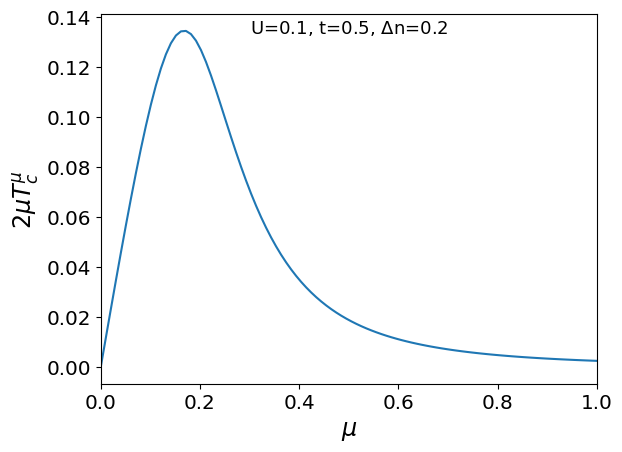

2*Tc= 0.0024282967082007723
mu=1 val: 0.0024282967082007723
mu= 0.0 val: 0.0
Ts= -0.99498743710662
U= 0.10100000000000003
EDC= 0.039283035957089645
Vext= -0.011114335791594324
USC= 0.010000000225017687
Winf= -0.09099999977498235
Wcinf= -0.040499999774982316
calculated energy= -0.9568187367161071
Exact energy= -0.9568187399803473


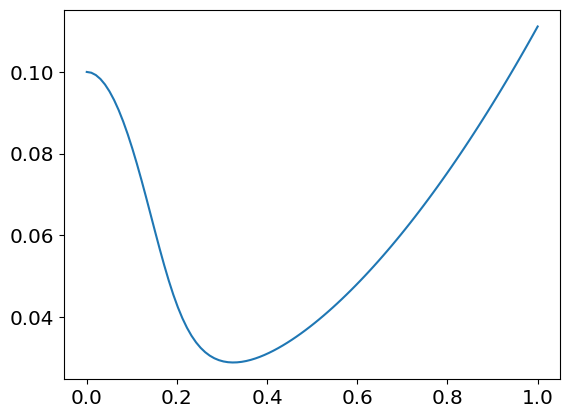

differnce= 3.264240211464653e-09


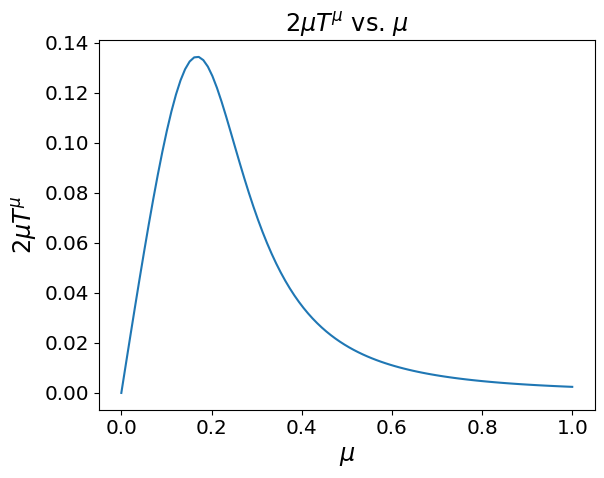

large mu val: 0.0024282967082007723


In [190]:
mus = np.linspace(0,1,100)
Kmus = np.empty(len(mus))

U = .1
t = .5
target_dn = .2

n1 = 1 - target_dn/2
n2 = 1 + target_dn/2

UH = ((U/2)*(n1**2+n2**2))
UHX = (U/2)*(1+(target_dn/2)**2)
#UH = hub.E_HX(n1,U)

Ts = hub.Ts(n1,t)

dvs = []
Tmus = np.empty(len(mus))

Tvec = np.empty(len(mus))


for i,mu in enumerate(mus):
    func = hub.dn_search_func_gen(U,mu**2*t,target_dn)
    #y = []
    #x = np.linspace(-100,100,20)
    #for p in x:
    #    y.append(func(p))
    #plt.plot(x,y)
    #plt.show()
    dv = optimize.bisect(func,-100000,100000)
    dvs.append(dv)
    
    T_op = hub.hub_kin_operator(t)
    
    eig, vec = hub.hub_2site(U,mu**2*t,dv)
    
    #print(np.dot(vec.T,np.dot(T_op,vec)))
    #print(Ts)
    
    T = np.dot(vec.T,np.dot(T_op,vec))
    #Kmus[i] = 2*mu*T-Ts
    Kmus[i] = (2*mu*(T-Ts))
    Tvec[i] = T
    Tmus[i] = 2*mu*T
    #Kmus[i] = (T-Ts)
    #Kmus[i] = T
    
    if mu == 1:
        Tc = T-Ts
        print('Tc=',Tc)
    
print()
print('non-interacting kinetic: ',Ts)
print('last value in the Tvec: ',Tvec[-1])
plt.plot(mus,Tvec-Ts)
plt.show()
    
EDC = simps(Kmus,mus)
#print(EDC)
plt.plot(mus,Kmus)
#plt.plot(mus,2*mus*(Tvec-Ts))
plt.xlabel('$\mu$')
plt.ylabel('$2\mu T_c^\mu$')
plt.xlim((0,1))
plt.annotate('U='+str(U)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.savefig('upside_down_images/zero_temp_upside_down_demo.png',bbox_inches='tight')
plt.show()

print('2*Tc=',2*Tc)
print('mu=1 val:',Kmus[-1])
print('mu=',mus[0], 'val:',Kmus[0])
print('Ts=',Ts)
print('U=',UH)
print('EDC=',EDC)

lam = 1
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-1000000,1000000)
eig,vec = hub.hub_2site(U,t,dv)

Vext_op = hub.hub_pot_operator(dv)
Vext = np.dot(vec.T,np.dot(Vext_op,vec))
print('Vext=',Vext)

lam = 100000
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-100000000000,100000000000)
eiglam,veclam = hub.hub_2site(lam*U,t,dv)

Vee_op = hub.hub_int_operator(U)
VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))
print('USC=',VSC)
print('Winf=',VSC-UH)
print('Wcinf=',VSC-UHX)


calc = VSC+Ts+EDC+Vext
print('calculated energy=',calc)
print('Exact energy=',eig)

plt.plot(mus,dvs)
plt.show()

plt.plot(mus,Kmus)
plt.xlabel('$\mu$')
plt.ylabel('$2\mu T^\mu$')
plt.title('$2\mu T^\mu$ vs. $\mu$')
plt.savefig('No_Temp_Tmu.png')
print('differnce=',calc-eig)
plt.show()
print('large mu val:',Kmus[-1])

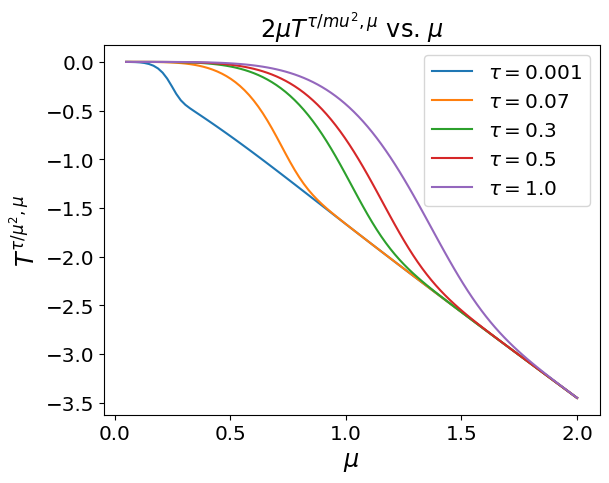

In [5]:
thermal_mus = np.linspace(0.05,2,100)
taus = np.array([.001,.07,.3,.5,1])
Ts = np.empty((len(taus),len(thermal_mus)))
U = 1
t = .5
target_dn = 1

for i, tau in enumerate(taus):
    dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))
    for j, mu in enumerate(thermal_mus):
        Ts[i,j],dv_guess = Therm.Weird_muT(t,mu,U,tau,target_dn,dv_guess)
        
for i in range(len(taus)):
    plt.plot(thermal_mus,2*thermal_mus*Ts[i,:],label='$\\tau=$'+str(taus[i]))
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel("$T^{\\tau/\mu^2,\mu}$")
plt.title('$2\mu T^{\\tau/mu^2,\mu}$ vs. $\mu$')
#plt.savefig('Weird_Scaled_Kinetic_Component.png')
plt.show()

Ss = np.empty((len(taus),len(thermal_mus)))

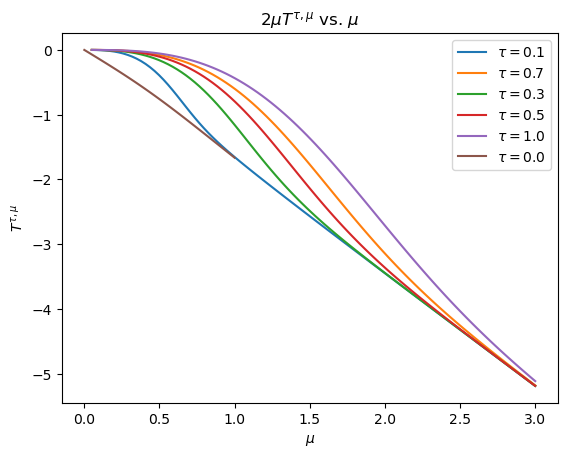

In [33]:
thermal_mus = np.linspace(0.05,3,100)
taus = np.array([.1,.7,.3,.5,1])
Ts = np.empty((len(taus),len(thermal_mus)))
U = 1
t = .5
target_dn = 1

for i, tau in enumerate(taus):
    dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))
    for j, mu in enumerate(thermal_mus):
        Ts[i,j],dv_guess = Therm.Weird_muT_no_temp(t,mu,U,tau,target_dn,dv_guess)
        
for i in range(len(taus)):
    plt.plot(thermal_mus,2*thermal_mus*Ts[i,:],label='$\\tau=$'+str(taus[i]))
plt.plot(mus,Tmus,label='$\\tau=$0.0')
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel("$T^{\\tau,\mu}$")
plt.title('$2\mu T^{\\tau,\mu}$ vs. $\mu$')
plt.savefig('Kinetic_no_temp_scaling.png')
plt.show()

## Take the previous plots and make actual AC curves

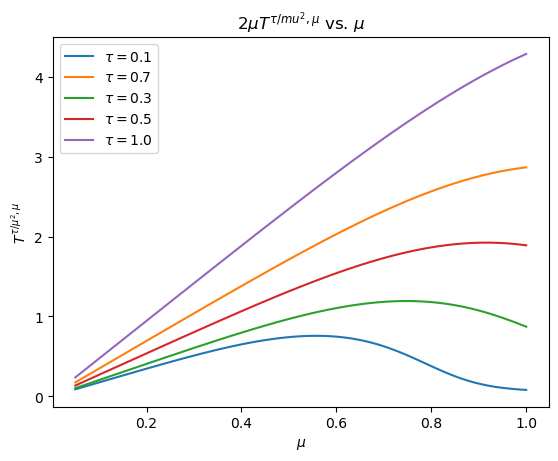

In [111]:
thermal_mus = np.linspace(0.05,1,100)
taus = np.array([.1,.7,.3,.5,1])
Ts = np.empty((len(taus),len(thermal_mus)))
U = 1
t = .5
target_dn = 1

Ttauss = np.empty(len(taus))
Stauss = np.empty(len(taus))

ADCs = np.empty(len(taus))

weird_integrand = np.empty(Ts.shape)

for i, tau in enumerate(taus):
    dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))
    delta_vks = KS_Therm.find_dvks(t,[tau],[target_dn])
    Ttauss[i] = KS_Therm.Ts(t,tau,delta_vks)
    Stauss[i] = KS_Therm.entropy(delta_vks,t,tau)
    for j, mu in enumerate(thermal_mus):
        Ts[i,j],dv_guess = Therm.Weird_muT(t,mu,U,tau,target_dn,dv_guess)
        
for i in range(len(taus)):
    weird_integrand[i,:] = 2*thermal_mus*(Ts[i,:]-Ttauss[i]+taus[i]*Stauss[i])
    ADCs[i] = simps(weird_integrand[i,:],thermal_mus)
    plt.plot(thermal_mus,weird_integrand[i,:],label='$\\tau=$'+str(taus[i]))
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel("$T^{\\tau/\mu^2,\mu}$")
plt.title('$2\mu T^{\\tau/\mu^2,\mu}$ vs. $\mu$')
plt.show()

In [109]:
lam = 100000
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-100000000000,100000000000)
eiglam,veclam = hub.hub_2site(lam*U,t,dv)

Vee_op = hub.hub_int_operator(U)
VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))

for i,tau in enumerate(taus):

    Ttaus = Ttauss[i]
    Ss = Stauss[i]

    lam = 1
    func = Therm.Thermal_dn_search_func_gen(lam*U,t,tau,target_dn)
    dv = optimize.bisect(func,-100,100,xtol=2e-12)
    Vext = Therm.Expectation(U,t,dv/2,-dv/2,U/2,[tau],operator='ext_potential')

    # calculate the exact energy
    _,_,A = Therm.Thermal_2particle_Hubbard(U,t,dv,[tau])

    print('calculated energy:',ADCs[i]+VSC+Vext+(Ttaus-tau*Ss))
    print('true free energy:',A)

calculated energy: [-0.75323719]
true free energy: [-0.9178245]
calculated energy: [-0.85120943]
true free energy: [-2.25707334]
calculated energy: [-0.59774631]
true free energy: [-1.17346099]
calculated energy: [-0.69008492]
true free energy: [-1.67833668]
calculated energy: [-1.14515469]
true free energy: [-3.18315315]


# Calculate and plot M for multiple values of U and tau

In [3]:
Us = np.array([.1,1,2,5,10])
taus = np.array([.5,1,2])
t = np.array([.5])
Kcs = np.empty((len(Us),100,len(taus)))
Kc_low_mus = np.empty((len(Us),len(taus)))

#np.save('upside_down_data/Us.npy',Us)
#np.save('upside_down_data/Taus.npy',taus)
#np.save('upside_down_data/t.npy',t)

In [33]:
t = .5
U = .1
tau = .01
target_dn = .1

EHX = (U/2)*(1+(target_dn/2)**2)

mus = np.linspace(.01,1,100)

lammus = 1/mus**2

Kc = np.empty(len(mus))
        
for k,mu in enumerate(mus):
    
    taumu = tau/mu**2
            
    dv_guess = -float(KS_Therm.find_dvks(t,[taumu],[target_dn]))
            
    if k%10==0:
        print(k)
                
    intlams = np.linspace(0.01,lammus[k],200)
    Wintlams = np.empty(len(intlams))
            
    for i, lam in enumerate(intlams):
                
        Wintlams[i],dv_guess = Therm.Thermal_hub_Uc(t,lam,U,taumu,target_dn,EHX,dv_guess)
    
    Kc[k] = 2*mu*simps(Wintlams-Wintlams[-1],intlams)
                
    
print('done')

/var/folders/t1/zfkb41qs5771gpq7sqzvr71c0000gn/T/ipykernel_14212/4146097544.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dv_guess = -float(KS_Therm.find_dvks(t,[taumu],[target_dn]))
/var/folders/t1/zfkb41qs5771gpq7sqzvr71c0000gn/T/ipykernel_14212/4146097544.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Wintlams[i],dv_guess = Therm.Thermal_hub_Uc(t,lam,U,taumu,target_dn,EHX,dv_guess)


0
10
20
30
40
50
60
70
80
90
done


In [34]:
i = 0
j = 2
Kcs[i,:,j] = Kc
Kc_low_mus[i,j] = mus[0]
print(Kc_low_mus)

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [35]:
#np.save('upside_down_data/M_DC_vary_U_vary_tau_constant_t.npy',Kcs)
#np.save('upside_down_data/low_mus.npy',Kc_low_mus)

(100,)
(100,)


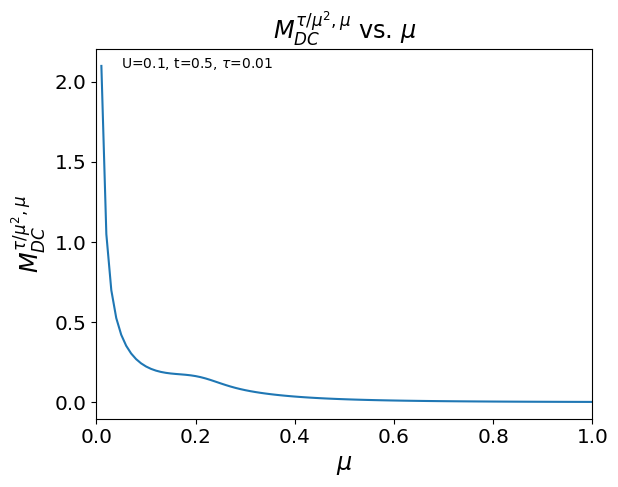

ADC= 0.09131463315166924
calculated energy: [-0.90520391]
true free energy: [-0.95263465]


In [36]:
lam = 100000
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-100000000000,100000000000)
eiglam,veclam = hub.hub_2site(lam*U,t,dv)

Vee_op = hub.hub_int_operator(U)
VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))

delta_vks = KS_Therm.find_dvks(t,[tau],[target_dn])
Ttaus = KS_Therm.Ts(t,tau,delta_vks)
Ss = KS_Therm.entropy(delta_vks,t,tau)

lam = 1
func = Therm.Thermal_dn_search_func_gen(lam*U,t,tau,target_dn)
dv = optimize.bisect(func,-100,100,xtol=2e-12)
Vext = Therm.Expectation(U,t,dv/2,-dv/2,U/2,[tau],operator='ext_potential')

# calculate the exact energy
_,_,A = Therm.Thermal_2particle_Hubbard(U,t,dv,[tau])

print(mus.shape)
print(Kc.shape)
plt.plot(mus,Kc)
EDC = simps(Kc,mus)
plt.xlabel('$\mu$')
plt.ylabel('$M^{\\tau/\mu^2,\mu}_{DC}$')
plt.title('$M^{\\tau/\mu^2,\mu}_{DC}$ vs. $\mu$')
plt.annotate('U='+str(U)+', t='+str(t)+', $\\tau$='+str(tau),xy=(0.05,0.95),xycoords='axes fraction')
plt.xlim((0,1))
#plt.savefig('Upside_Down_Therm_AC_from_Right_Side_Up.png')
plt.show()
#print('2*Tc=',Kcs[-1])
#print('2*Winf=',Kcs[0])
print('ADC=',EDC)
print('calculated energy:',EDC+VSC+Vext+(Ttaus-tau*Ss))
print('true free energy:',A)

0.1


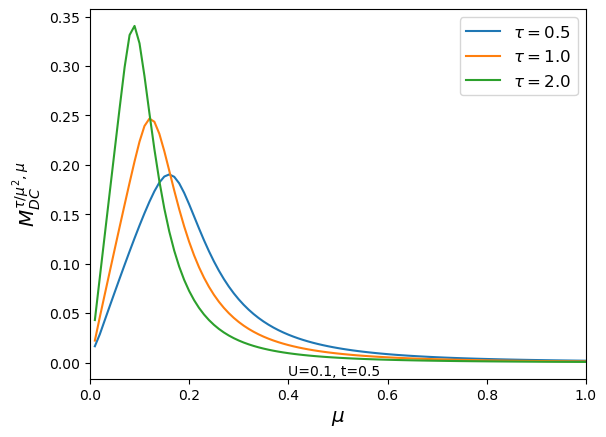

1.0


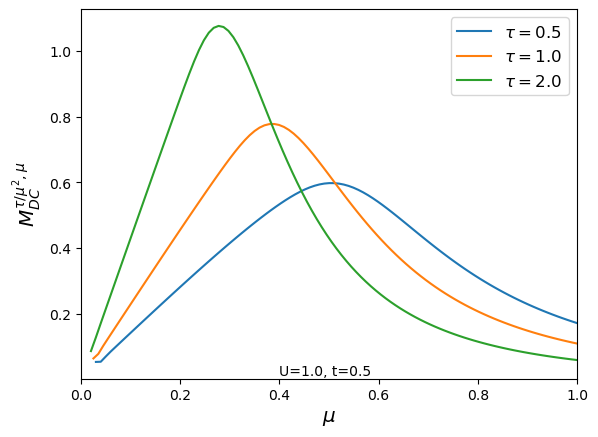

2.0


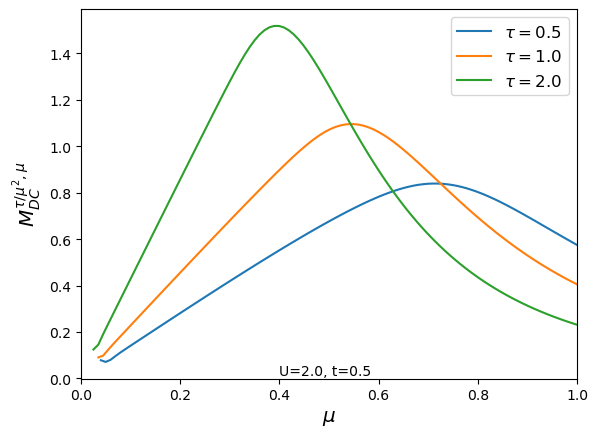

5.0


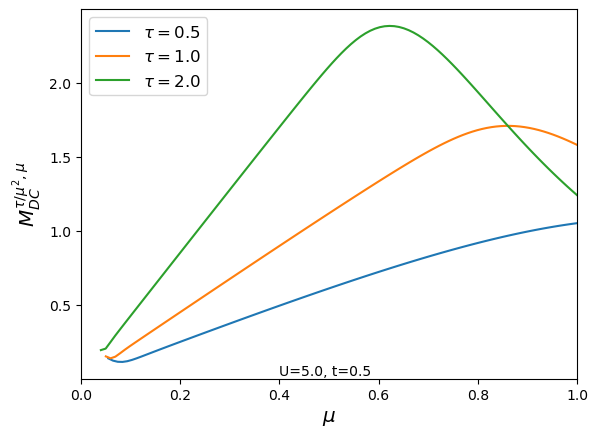

10.0


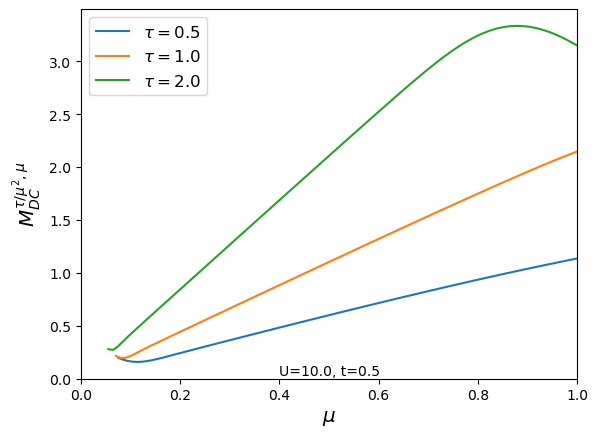

In [131]:
plt.rcParams.update({'axes.labelsize':'x-large'})
plt.rcParams.update({'legend.fontsize':'large'})
for i,U in enumerate(Us):
    print(U)
    for j,tau in enumerate(taus):
        plt.plot(np.linspace(Kc_low_mus[i,j],1,100),Kcs[i,:,j],label='$\\tau=$'+str(tau))
    plt.legend()
    plt.xlim((0,1))
    plt.xlabel('$\mu$')
    plt.ylabel('$M^{\\tau/\mu^2,\mu}_{DC}$')
    plt.annotate('U='+str(U)+', t='+str(t),xy=(0.4,0.01),xycoords='axes fraction')
    plt.savefig('Upside_Down_AC_U'+str(U)+'.png')
    plt.show()

In [136]:
Us = np.array([.1,1,2,5,10])
taus = np.array([.5,1,2])
t = np.array([.5])
Kcs_mu_low_to_2 = np.empty((len(Us),200,len(taus)))

In [178]:
t = .5
U = 1
tau = .5
target_dn = .1

EHX = (U/2)*(1+(target_dn/2)**2)

mus = np.linspace(1,2,101)

lammus = 1/mus**2

Kc = np.empty(len(mus))
        
for k,mu in enumerate(mus):
            
    dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))
            
    if k%10==0:
        print(k)
                
    intlams = np.linspace(0.01,lammus[k],200)
    Wintlams = np.empty(len(intlams))
            
    for i, lam in enumerate(intlams):
                
        Wintlams[i],dv_guess = Therm.Thermal_hub_Uc(t,lam,U,tau,target_dn,EHX,dv_guess)
    
    Kc[k] = 2*mu*simps(Wintlams-Wintlams[-1],intlams)
                
    
print('done')

0
10
20
30
40
50
60
70
80
90
100
done


In [179]:
i = 1
j = 0
Kcs_mu_low_to_2[i,:,j] = np.append(Kcs[i,:,j],Kc[1:])

In [184]:
i = 2
j = 2
Kcs_mu_low_to_2[i,:100,j] = Kcs[i,:,j]

In [181]:
np.save('upside_down_data/M_DC_vary_U_vary_tau_constant_t_mu_low_to_2.npy',Kcs_mu_low_to_2)

0.1


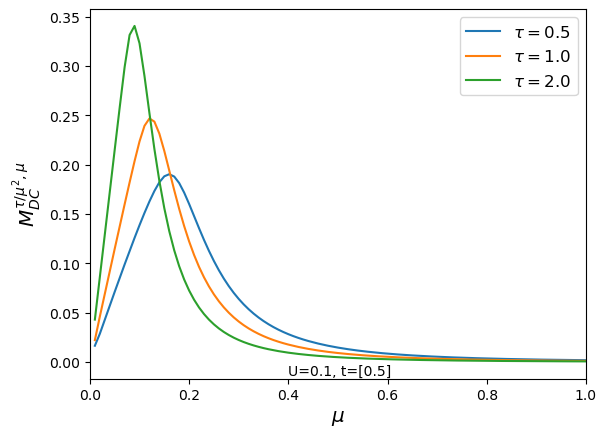

1.0


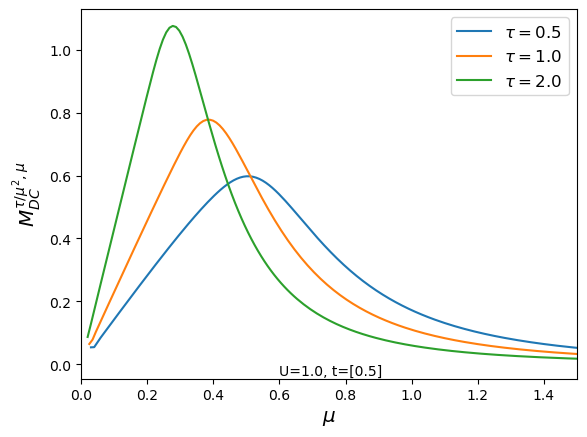

2.0


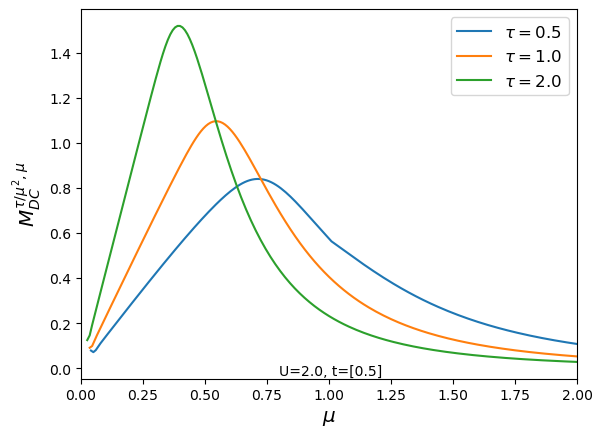

5.0


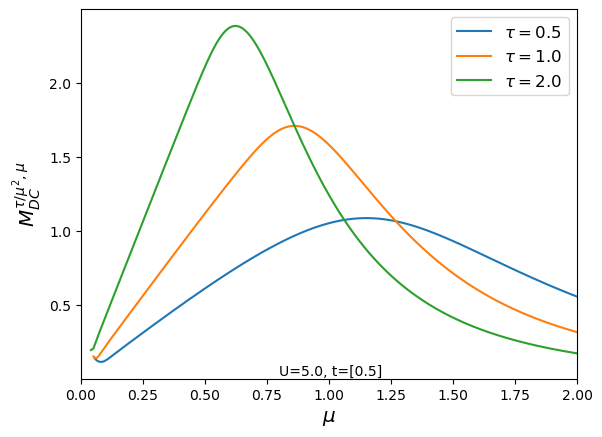

In [202]:
Us = np.array([.1,1,2,5])
taus = np.array([.5,1,2])
t = np.array([.5])

plt.rcParams.update({'axes.labelsize':'x-large'})
plt.rcParams.update({'legend.fontsize':'large'})
for i,U in enumerate(Us):
    print(U)
    for j,tau in enumerate(taus):
        grid_one = np.linspace(Kc_low_mus[i,j],1,100)
        grid_two = np.linspace(1,2,101)
        plot_mus = np.append(grid_one,grid_two[1:])
        plt.plot(plot_mus,Kcs_mu_low_to_2[i,:,j],label='$\\tau=$'+str(tau))
    plt.legend()
    if i== 0:
        plt.xlim((0,1))
    elif i == 1:
        plt.xlim((0,1.5))
    elif i == 2:
        plt.xlim((0,2))
    elif i == 3:
        plt.xlim((0,2))
    plt.xlabel('$\mu$')
    plt.ylabel('$M^{\\tau/\mu^2,\mu}_{DC}$')
    plt.annotate('U='+str(U)+', t='+str(t),xy=(0.4,0.01),xycoords='axes fraction')
    plt.savefig('Upside_Down_AC_different_mu_axes_U'+str(U)+'.png',dpi=300)
    plt.show()

In [190]:
Us = np.array([5])
taus = np.array([.5,1,2])
t = np.array([.5])
Kcs_U5_mu_low_to_3 = np.empty((300,len(taus)))

In [ ]:
t = .5
U = 5
tau = .5
target_dn = .1

EHX = (U/2)*(1+(target_dn/2)**2)

mus = np.linspace(.06,3,300)

lammus = 1/mus**2

Kc = np.empty(len(mus))
        
for k,mu in enumerate(mus):
            
    dv_guess = -float(KS_Therm.find_dvks(t,[tau/mu],[target_dn]))
            
    if k%10==0:
        print(k)
                
    intlams = np.linspace(0.01,lammus[k],200)
    Wintlams = np.empty(len(intlams))
            
    for i, lam in enumerate(intlams):
                
        Wintlams[i],dv_guess = Therm.Thermal_hub_Uc(t,lam,U,tau/mu,target_dn,EHX,dv_guess)
    
    Kc[k] = 2*mu*simps(Wintlams-Wintlams[-1],intlams)
                
    
print('done')

In [200]:
i = 0
Kcs_U5_mu_low_to_3[:,i] = np.append(Kcs_mu_low_to_2[3,:,i],Kc[1:])

0.055
0.05
0.04


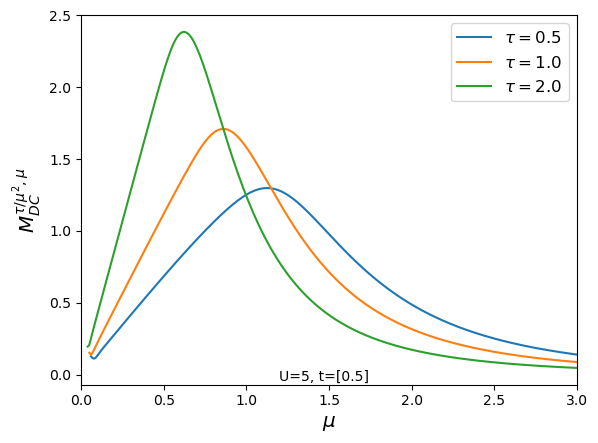

In [208]:
taus = np.array([.5,1,2])
t = np.array([.5])

plt.rcParams.update({'axes.labelsize':'x-large'})
plt.rcParams.update({'legend.fontsize':'large'})

grid = np.linspace(.06,3,300)

for i,tau in enumerate(taus):
    
    grid_one = np.linspace(Kc_low_mus[3,i],1,100)
    print(grid_one[0])
    grid_two = np.linspace(1,2,101)
    grid_three = np.linspace(2,3,101)
    plot_mus = np.append(grid_one,grid_two[1:])
    plot_mus = np.append(plot_mus,grid_three[1:])
    
    if i > 0:
        plt.plot(plot_mus,Kcs_U5_mu_low_to_3[:,i],label='$\\tau=$'+str(tau))
    else:
        plt.plot(grid,Kc,label='$\\tau=$'+str(tau))
    
plt.legend()
plt.xlim((0,3))
plt.xlabel('$\mu$')
plt.ylabel('$M^{\\tau/\mu^2,\mu}_{DC}$')
plt.annotate('U=5, t='+str(t),xy=(0.4,0.01),xycoords='axes fraction')
plt.savefig('Upside_Down_AC_different_mu_axes_U'+str(U)+'.png',dpi=300)
plt.show()

## Scratch Paper

ref 117, 34, 72, 74, 80  in Sara's Thesis might be helpful. \

/var/folders/t1/zfkb41qs5771gpq7sqzvr71c0000gn/T/ipykernel_14212/2833549952.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))
/var/folders/t1/zfkb41qs5771gpq7sqzvr71c0000gn/T/ipykernel_14212/2833549952.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ts[i,j],dv_guess = Therm.Weird_muT(t,mu,U,tau,target_dn,dv_guess)
/var/folders/t1/zfkb41qs5771gpq7sqzvr71c0000gn/T/ipykernel_14212/2833549952.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing 

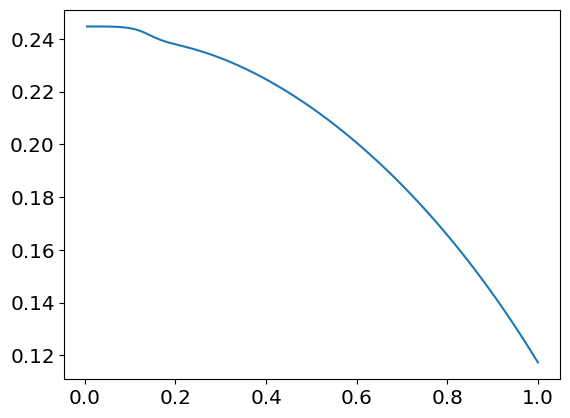

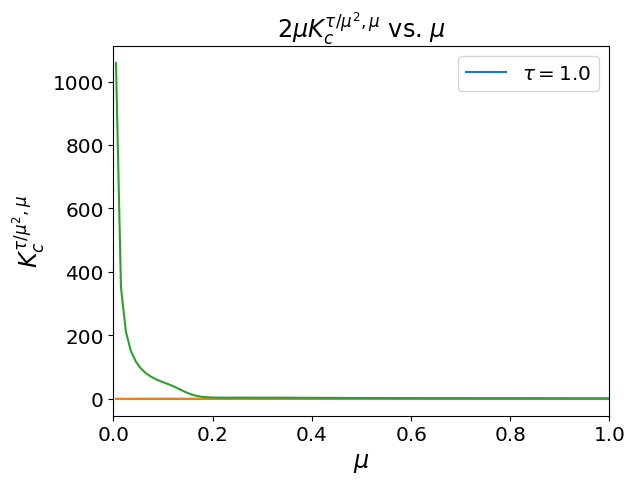

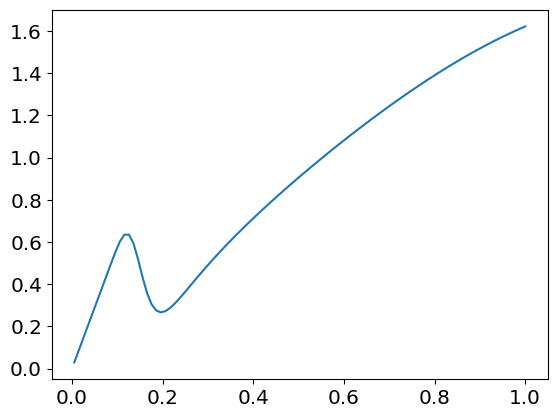

In [27]:
thermal_mus = np.linspace(0.005,1,100)
taus = np.array([1.0])
Ts = np.empty((len(taus),len(thermal_mus)))
Ss = np.empty((len(taus),len(thermal_mus)))

U = 5
t = .5
target_dn = .1
d_tau_der = .0001
n_tau_der = 5

tau_der_list = (np.arange(n_tau_der)-2)*d_tau_der

five_point_stencil = [-1,8,0,-8,1]

Oms = np.empty(n_tau_der)
der_taus = np.empty(n_tau_der)

for i, tau in enumerate(taus):
    dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))
    for j, mu in enumerate(thermal_mus):
        # solve for the Scaled kinetic energy and on-site potential differnce
        Ts[i,j],dv_guess = Therm.Weird_muT(t,mu,U,tau,target_dn,dv_guess)
        
        # dv_guess is the exact dv needed to achieve target_dn at this scaled kinetic energy.
        # Entropy should only be calculated after minimizing and solving the underlying system.
        S = 0
        for k,dtau in enumerate(tau_der_list):
            #_, Om = Therm.Partition(U,t*mu**2,dv_guess/2,-dv_guess/2,U/2,[tau/mu**2+dtau])# use to get my Grand Cannonical Potential energies
            _, Om = Therm.Partition(U,t*mu**2,dv_guess/2,-dv_guess/2,U/2,[tau+dtau])
            Oms[k] = Om
            #der_taus[k] = tau/mu**2+dtau
            der_taus[k] = tau+dtau
            S += Om*five_point_stencil[k]
            
        #print('numpy gradient:',np.gradient(Oms,der_taus)[2])
        S = (S/(12*d_tau_der))
        #print('my gradient:',S)
        Ss[i,j] = S
        
ks_dv = KS_Therm.find_dvks(t,taus,[target_dn])
ks_T = KS_Therm.Ts(t,taus,ks_dv)
ks_S = KS_Therm.entropy(ks_dv,t,taus)

ks_K = ks_T - taus[0]*ks_S
        
for i in range(len(taus)):
    
    plt.plot(thermal_mus,Ts[i,:]-ks_T)
    plt.show()
    
    K = Ts[i,:] - ks_T 
    K2 = - Ss[i,:] + ks_S #- ks_K
    #plt.plot(thermal_mus,Ss[i,:],label='S')
    plt.plot(thermal_mus,2*thermal_mus*K,label='$\\tau=$'+str(taus[i]))
    plt.plot(thermal_mus,2*thermal_mus*K2)
    plt.plot(thermal_mus,2*thermal_mus*taus[i]/thermal_mus**2*K2+2*thermal_mus*K)
    #plt.plot(thermal_mus,K,label='$\\tau=$'+str(taus[i]))
    #M = 2*thermal_mus*taus[i]/thermal_mus**2*K2+2*thermal_mus*K
    M = 2*thermal_mus*taus[i]*K2+2*thermal_mus*K
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel("$K^{\\tau/\mu^2,\mu}_c$")
plt.title('$2\mu K^{\\tau/\mu^2,\mu}_c$ vs. $\mu$')
plt.xlim(0,1)
#plt.savefig('Weird_Scaled_Kinetic_Component.png')
plt.show()
plt.plot(thermal_mus,M)
plt.show()

In [28]:
for i,tau in enumerate(taus):
    Kcs = M
    
    EDC = simps(Kcs,thermal_mus)

    ##################### calc refrence properties#######################

    lam = 100000
    func = hub.dn_search_func_gen(lam*U,t,target_dn)
    dv = optimize.bisect(func,-100000000000,100000000000)
    eiglam,veclam = hub.hub_2site(lam*U,t,dv)

    Vee_op = hub.hub_int_operator(U)
    VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))

    delta_vks = KS_Therm.find_dvks(t,[tau],[target_dn])
    Ttaus = KS_Therm.Ts(t,tau,delta_vks)
    Ss = KS_Therm.entropy(delta_vks,t,tau)

    lam = 1
    func = Therm.Thermal_dn_search_func_gen(lam*U,t,float(tau),target_dn)
    dv = optimize.bisect(func,-100,100,xtol=2e-12)
    Vext = Therm.Expectation(U,t,dv/2,-dv/2,U/2,[float(tau)],operator='ext_potential')

    calc_A = EDC+VSC+Vext+(Ttaus-tau*Ss)
    print('energy before decorrelation: ',VSC+Vext+(Ttaus-tau*Ss))
    print('calc free energy:',calc_A)

    ############### calc exact energy #############################
    _,_,A = Therm.Thermal_2particle_Hubbard(U,t,dv,[float(tau)])
    print('true free energy:',A)
    print()
    

energy before decorrelation:  [-2.70100664]
calc free energy: [-1.79720886]
true free energy: [-1.63444102]



Tc= 0.0012141483541003861

non-interacting kinetic:  -0.99498743710662
last value in the Tvec:  -0.9937732887525196


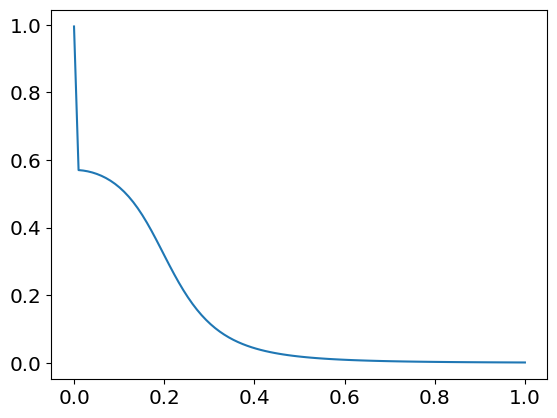

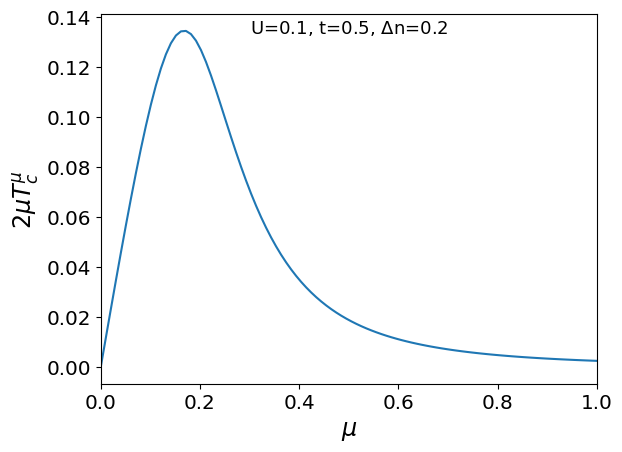

2*Tc= 0.0024282967082007723
mu=1 val: 0.0024282967082007723
mu= 0.0 val: 0.0
Ts= -0.99498743710662
U= 0.10100000000000003
EDC= 0.039283035957089645
Vext= -0.011114335791594324
USC= 0.010000000225017687
Winf= -0.09099999977498235
Wcinf= -0.040499999774982316
calculated energy= -0.9568187367161071
Exact energy= -0.9568187399803473


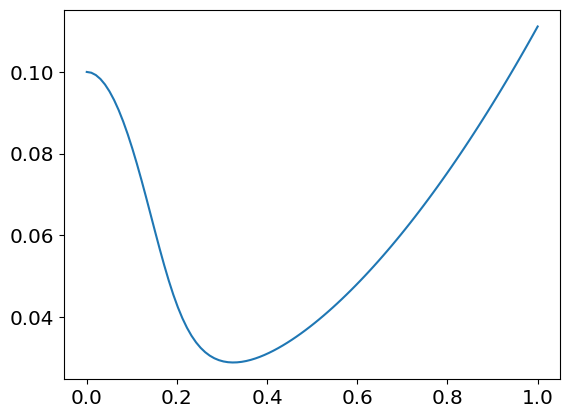

differnce= 3.264240211464653e-09


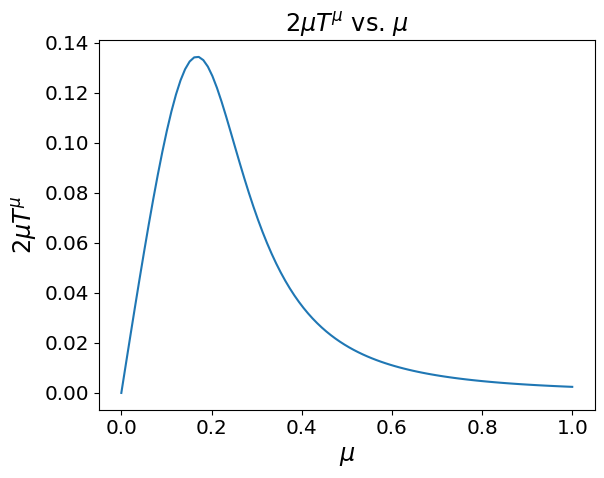

In [130]:
mus = np.linspace(0,1,100)
Kmus = np.empty(len(mus))

U = .1
t = .5
target_dn = .2

n1 = 1 - target_dn/2
n2 = 1 + target_dn/2

UH = ((U/2)*(n1**2+n2**2))
UHX = (U/2)*(1+(target_dn/2)**2)
#UH = hub.E_HX(n1,U)

Ts = hub.Ts(n1,t)

dvs = []
Tmus = np.empty(len(mus))

Tvec = np.empty(len(mus))


for i,mu in enumerate(mus):
    func = hub.dn_search_func_gen(U,mu**2*t,target_dn)
    #y = []
    #x = np.linspace(-100,100,20)
    #for p in x:
    #    y.append(func(p))
    #plt.plot(x,y)
    #plt.show()
    dv = optimize.bisect(func,-100000,100000)
    dvs.append(dv)
    
    T_op = hub.hub_kin_operator(t)
    
    eig, vec = hub.hub_2site(U,mu**2*t,dv)
    
    #print(np.dot(vec.T,np.dot(T_op,vec)))
    #print(Ts)
    
    T = np.dot(vec.T,np.dot(T_op,vec))
    #Kmus[i] = 2*mu*T-Ts
    Kmus[i] = (2*mu*(T-Ts))
    Tvec[i] = T
    Tmus[i] = 2*mu*T
    #Kmus[i] = (T-Ts)
    #Kmus[i] = T
    
    if mu == 1:
        Tc = T-Ts
        print('Tc=',Tc)
    
print()
print('non-interacting kinetic: ',Ts)
print('last value in the Tvec: ',Tvec[-1])
plt.plot(mus,Tvec-Ts)
plt.show()
    
EDC = simps(Kmus,mus)
#print(EDC)
plt.plot(mus,Kmus)
#plt.plot(mus,2*mus*(Tvec-Ts))
plt.xlabel('$\mu$')
plt.ylabel('$2\mu T_c^\mu$')
plt.xlim((0,1))
plt.annotate('U='+str(U)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.savefig('upside_down_images/zero_temp_upside_down_demo.png',bbox_inches='tight')
plt.show()

print('2*Tc=',2*Tc)
print('mu=1 val:',Kmus[-1])
print('mu=',mus[0], 'val:',Kmus[0])
print('Ts=',Ts)
print('U=',UH)
print('EDC=',EDC)

lam = 1
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-1000000,1000000)
eig,vec = hub.hub_2site(U,t,dv)

Vext_op = hub.hub_pot_operator(dv)
Vext = np.dot(vec.T,np.dot(Vext_op,vec))
print('Vext=',Vext)

lam = 100000
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-100000000000,100000000000)
eiglam,veclam = hub.hub_2site(lam*U,t,dv)

Vee_op = hub.hub_int_operator(U)
VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))
print('USC=',VSC)
print('Winf=',VSC-UH)
print('Wcinf=',VSC-UHX)


calc = VSC+Ts+EDC+Vext
print('calculated energy=',calc)
print('Exact energy=',eig)

plt.plot(mus,dvs)
plt.show()

plt.plot(mus,Kmus)
plt.xlabel('$\mu$')
plt.ylabel('$2\mu T^\mu$')
plt.title('$2\mu T^\mu$ vs. $\mu$')
plt.savefig('No_Temp_Tmu.png')
print('differnce=',calc-eig)

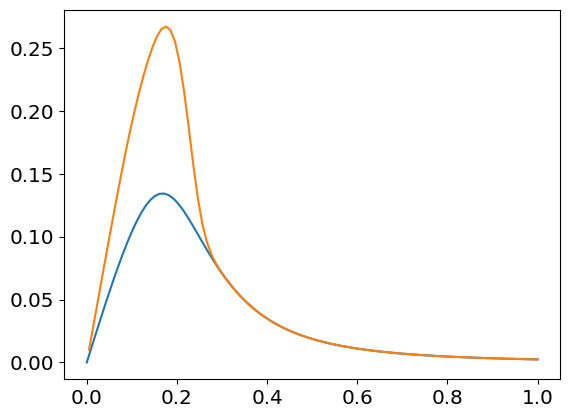

In [131]:
plt.plot(mus,Kmus)
plt.plot(thermal_mus,2*thermal_mus*K,label='$\\tau=$'+str(taus[0]))
plt.show()

Try scaling the kinetic of the temprature dependent system without temp scaling. Then try to recover the zero temp limit from the non-tmep scaled system.

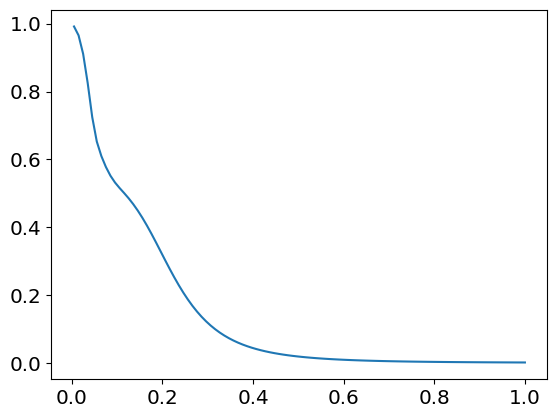

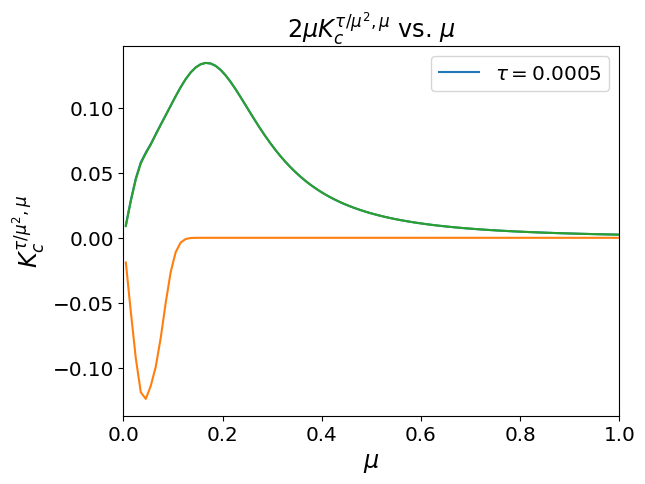

In [141]:
thermal_mus = np.linspace(0.005,1,100)
taus = np.array([.0005])
Ts = np.empty((len(taus),len(thermal_mus)))
Ss = np.empty((len(taus),len(thermal_mus)))

U = .1
t = .5
target_dn = .2
d_tau_der = .0001
n_tau_der = 5

tau_der_list = (np.arange(n_tau_der)-2)*d_tau_der

five_point_stencil = [-1,8,0,-8,1]

Oms = np.empty(n_tau_der)
der_taus = np.empty(n_tau_der)

for i, tau in enumerate(taus):
    dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))
    for j, mu in enumerate(thermal_mus):
        # solve for the Scaled kinetic energy and on-site potential differnce
        Ts[i,j],dv_guess = Therm.Weird_muT_no_temp(t,mu,U,tau,target_dn,dv_guess)
        
        # dv_guess id the exact dv needed to achieve target_dn at this scaled kinetic energy.
        # Entropy should only be calculated after minimizing and solving the underlying system.
        S = 0
        for k,dtau in enumerate(tau_der_list):
            _, Om = Therm.Partition(U,t*mu**2,dv_guess/2,-dv_guess/2,U/2,[tau+dtau]) # use to get my Grand Cannonical Potential energies
            Oms[k] = Om
            der_taus[k] = tau+dtau
            S += Om*five_point_stencil[k]
            
        #print('numpy gradient:',np.gradient(Oms,der_taus)[2])
        S = (S/(12*d_tau_der))
        #print('my gradient:',S)
        Ss[i,j] = S
        
ks_dv = KS_Therm.find_dvks(t,taus,[target_dn])
ks_T = KS_Therm.Ts(t,taus,ks_dv)
ks_S = KS_Therm.entropy(ks_dv,t,taus)

ks_K = ks_T - taus[0]*ks_S
        
for i in range(len(taus)):
    
    plt.plot(thermal_mus,Ts[i,:]-ks_T)
    plt.show()
    
    K = Ts[i,:] - ks_T 
    K2 = - Ss[i,:] + ks_S #- ks_K
    #plt.plot(thermal_mus,Ss[i,:],label='S')
    plt.plot(thermal_mus,2*thermal_mus*K,label='$\\tau=$'+str(taus[i]))
    plt.plot(thermal_mus,2*thermal_mus*K2)
    plt.plot(thermal_mus,taus[i]/thermal_mus**2*K2+2*thermal_mus*K)
    #plt.plot(thermal_mus,K,label='$\\tau=$'+str(taus[i]))
    M = 2*thermal_mus*K
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel("$K^{\\tau/\mu^2,\mu}_c$")
plt.title('$2\mu K^{\\tau/\mu^2,\mu}_c$ vs. $\mu$')
plt.xlim(0,1)
#plt.savefig('Weird_Scaled_Kinetic_Component.png')
plt.show()

In [133]:
for i,tau in enumerate(taus):
    Kcs = M
    
    EDC = simps(Kcs,thermal_mus)

    ##################### calc refrence properties#######################

    lam = 100000
    func = hub.dn_search_func_gen(lam*U,t,target_dn)
    dv = optimize.bisect(func,-100000000000,100000000000)
    eiglam,veclam = hub.hub_2site(lam*U,t,dv)

    Vee_op = hub.hub_int_operator(U)
    VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))

    delta_vks = KS_Therm.find_dvks(t,[tau],[target_dn])
    Ttaus = KS_Therm.Ts(t,tau,delta_vks)
    Ss = KS_Therm.entropy(delta_vks,t,tau)

    lam = 1
    func = Therm.Thermal_dn_search_func_gen(lam*U,t,float(tau),target_dn)
    dv = optimize.bisect(func,-100,100,xtol=2e-12)
    Vext = Therm.Expectation(U,t,dv/2,-dv/2,U/2,[float(tau)],operator='ext_potential')

    calc_A = EDC+VSC+Vext+(Ttaus-tau*Ss)
    print('energy before decorrelation: ',VSC+Vext+(Ttaus-tau*Ss))
    print('calc free energy:',calc_A)

    ############### calc exact energy #############################
    _,_,A = Therm.Thermal_2particle_Hubbard(U,t,dv,[float(tau)])
    print('true free energy:',A)
    print()
    

energy before decorrelation:  [-0.99610177]
calc free energy: [-0.95589431]
true free energy: [-0.95681874]



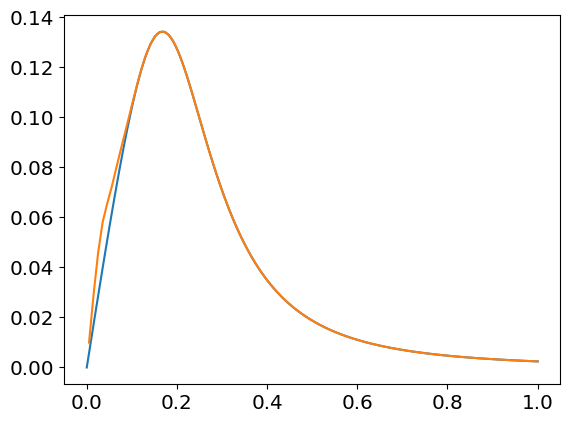

In [136]:
plt.plot(mus,Kmus)
plt.plot(thermal_mus,2*thermal_mus*K,label='$\\tau=$'+str(taus[0]))
plt.show()

Compute K_s^tau - K_s^tau/mu^2

[-0.02491124]


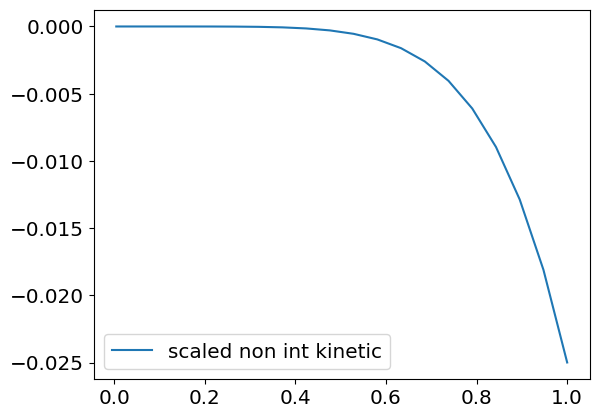

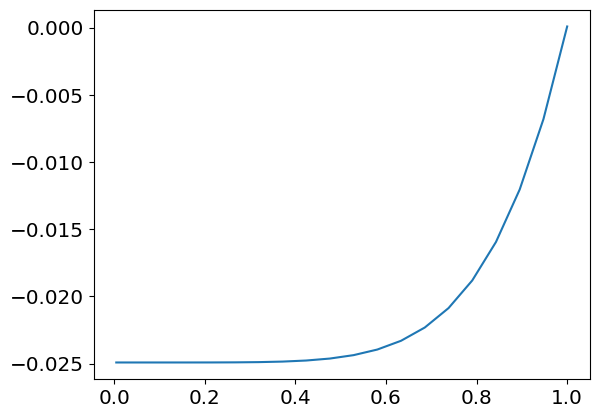

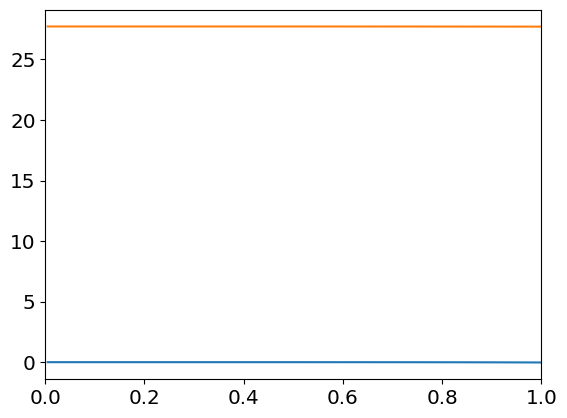

In [216]:
taus = np.array([10])
t = .5
target_dn = .2

ks_dv = KS_Therm.find_dvks(t,taus,[target_dn])
ks_T_tau = KS_Therm.Ts(t,taus,ks_dv)
print(ks_T_tau)
ks_S_tau = KS_Therm.entropy(ks_dv,t,taus)

mus = np.linspace(.005,1,20)
ks_T_tau_mu = np.empty(len(mus))
ks_S_tau_mu = np.empty(len(mus))

for i,mu in enumerate(mus):
    
    func = KS_Therm.del_n_root(mu**2*t,tau/mu**2,target_dn)
    #func = KS_Therm.del_n_root(t,tau/mu**2,target_dn)
    ks_dv = optimize.bisect(func,-40,40)

    ks_T_tau_mu[i] = KS_Therm.Ts(mu**2*t,taus/mu**2,ks_dv)
    ks_S_tau_mu[i] = KS_Therm.entropy(ks_dv,mu**2*t,taus/mu**2)
    
plt.plot(mus,ks_T_tau_mu,label='scaled non int kinetic')
plt.legend()
plt.show()

plt.plot(mus,ks_T_tau-ks_T_tau_mu)
plt.show()

plt.plot(mus,ks_T_tau_mu)
plt.plot(mus,taus*ks_S_tau_mu)
plt.xlim(0,1)
plt.show()

# Thermal Upside Down Plotting for Different Variables

To alter the x and y axis limits call plt.xlim((lower,upper)) or the same for ylim before the savefig call

I generally only worked in variable=[1,5,10] but you can generate more data if you want. but in the plotting just specify the data to load by calling the fixed variables for you system. U is U, t is t, tau is tau but, dn is called target_dn.

### plotting over changing temp

In [ ]:
t = .5
U = 10
taus = [.1,1,5,10]
target_dn = .2

lam1 = np.linspace(.0001,1,2000)
lam2 = np.linspace(1,4,1001)
lam3 = np.linspace(4,16,2001)
lam4 = np.linspace(16,10000,20001)
lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])

ntaus = len(taus)

for i,tau in enumerate(taus):
    if i==0:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,dvs = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
        Kc_mat = np.empty((len(Kcs),ntaus))
        ex_Kc_mat = np.empty((len(ex_Kcs),ntaus))
        
        all_Kc_mat = np.empty((len(all_Kcs),ntaus))
        
        EDC_at_mu_mat = np.empty((len(EDC_at_mu),ntaus))
        
        dvs_mat = np.empty((len(dvs),ntaus))
        
    else:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,dvs = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
    Kc_mat[:,i] = Kcs
    ex_Kc_mat[:,i] = ex_Kcs
    all_Kc_mat[:,i] = all_Kcs
    EDC_at_mu_mat[:,i] = EDC_at_mu
    dvs_mat[:,i] = dvs

In [8]:
data = {}
data['taus'] = taus
data['Kcs'] = Kc_mat
data['mus'] = plotmus
data['ex_Kcs'] = ex_Kc_mat
data['ex_plotmus'] = ex_mus
data['all_Kc'] = all_Kc_mat
data['all_mus'] = mus
data['EDC_at_mu'] = EDC_at_mu_mat
data['dvs'] = dvs_mat
np.save('upside_down_data/data_U='+str(U)+'_t='+str(t)+'_dn='+str(target_dn)+'.npy',data)

ADC: 0.530968981002205
integral to $\mu$=5: 4.143742252421529
ADC: 0.9324675482986795
integral to $\mu$=5: 4.0995255336018275
ADC: 2.8869276454817703
integral to $\mu$=5: 4.060786822712146
ADC: 3.445531088919049
integral to $\mu$=5: 4.054700116935747


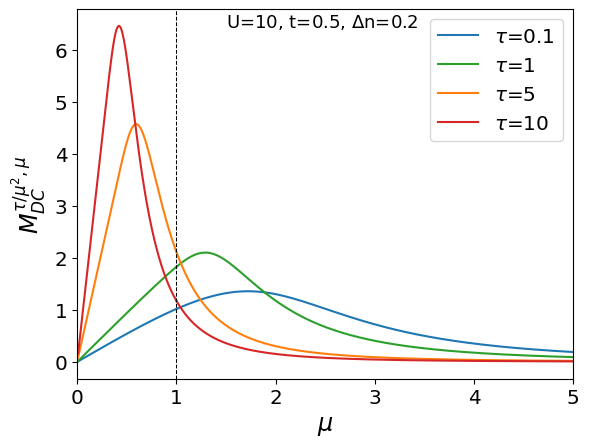

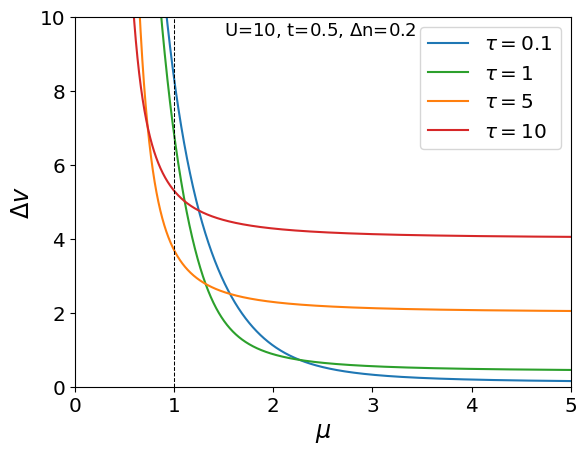

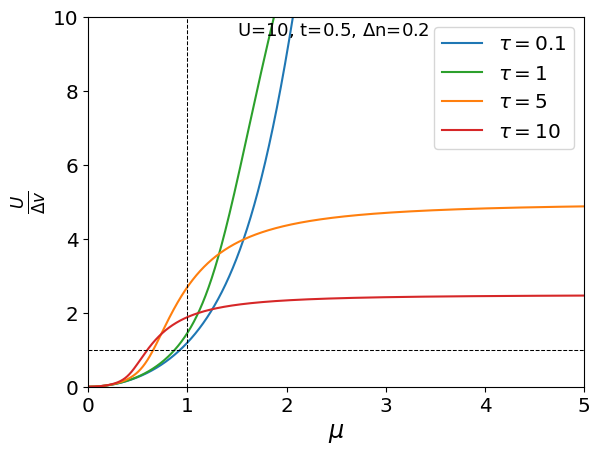

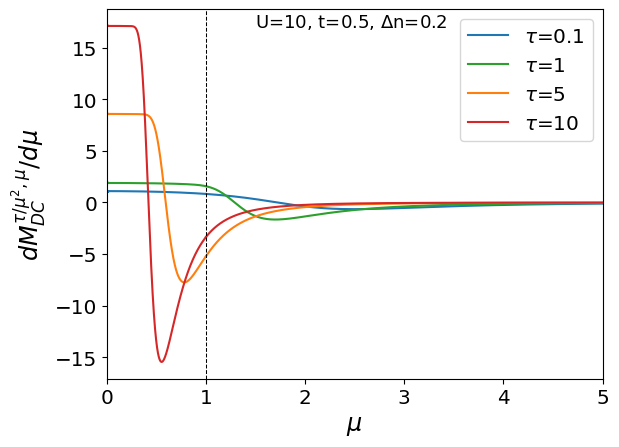

In [366]:
t = .5
U = 10
taus = [.1,1,5,10]
target_dn = .2

colors = ['tab:blue','tab:green','tab:orange','tab:red']

data = np.load('upside_down_data/data_U='+str(U)+'_t='+str(t)+'_dn='+str(target_dn)+'.npy',allow_pickle=True).item()

plotmus = data['mus']
ex_mus = data['ex_plotmus']
ex_Kc_mat = data['ex_Kcs']
taus = data['taus']
Kc_mat = data['Kcs']
all_Kc_mat = data['all_Kc']
mus = data['all_mus']
EDC_at_mu_mat = data['EDC_at_mu']
dvs_mat = data['dvs']

nACmus = len(plotmus)

for i,tau in enumerate(taus):
    
    plt.plot(plotmus,Kc_mat[:,i],color=colors[i],label='$\\tau$='+str(tau))
    ADC = simps(Kc_mat[:,i],plotmus)
    print('ADC:',ADC)
    plt.plot(mus[nACmus:],all_Kc_mat[nACmus:,i],color=colors[i])
    ADCextra = simps(all_Kc_mat[nACmus:,i],mus[nACmus:])
    print('integral to $\mu$=5:',ADC+ADCextra)

plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$M^{\\tau/\mu^2,\mu}_{DC}$')
plt.annotate('U='+str(U)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.savefig('upside_down_images/upside_down_U='+str(U)+'_t='+str(t)+'_dn='+str(target_dn)+'.png',bbox_inches='tight')
plt.show()
plt.close()

for i,tau in enumerate(taus):
    plt.plot(mus,dvs_mat[:,i],color=colors[i],label='$\\tau=$'+str(tau))
    
plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$\Delta v$')
plt.annotate('U='+str(U)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.ylim((0,10))
plt.savefig('upside_down_images/upside_down_dv_U='+str(U)+'_t='+str(t)+'_dn='+str(target_dn)+'.png',bbox_inches='tight')
plt.show()
plt.close()

for i,tau in enumerate(taus):
    plt.plot(mus,U/dvs_mat[:,i],color=colors[i],label='$\\tau=$'+str(tau))
    
plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.axhline(y=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$\\frac{U}{\Delta v}$')
plt.annotate('U='+str(U)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.ylim((0,10))
plt.savefig('upside_down_images/upside_down_U_over_dv_U='+str(U)+'_t='+str(t)+'_dn='+str(target_dn)+'.png',bbox_inches='tight')
plt.show()
plt.close()

for i,tau in enumerate(taus):
    
    plt.plot(plotmus,np.gradient(Kc_mat[:,i],plotmus),color=colors[i],label='$\\tau$='+str(tau))
    plt.plot(mus[nACmus:],np.gradient(all_Kc_mat[nACmus:,i],mus[nACmus:]),color=colors[i])

plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$dM^{\\tau/\mu^2,\mu}_{DC}/d\mu$')
plt.annotate('U='+str(U)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.savefig('upside_down_images/upside_down_derivative_U='+str(U)+'_t='+str(t)+'_dn='+str(target_dn)+'.png',bbox_inches='tight')
plt.show()
plt.close()

### Plot Over Changing U

In [24]:
t = .5
Us = [.1,1,5,10]
tau = 10
target_dn = .2

lam1 = np.linspace(.0001,1,2000)
lam2 = np.linspace(1,4,1001)
lam3 = np.linspace(4,16,2001)
lam4 = np.linspace(16,10000,20001)
lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])

ntaus = len(Us)

for i,U in enumerate(Us):
    if i==0:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,dvs = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
        Kc_mat = np.empty((len(Kcs),ntaus))
        ex_Kc_mat = np.empty((len(ex_Kcs),ntaus))
        
        all_Kc_mat = np.empty((len(all_Kcs),ntaus))
        
        EDC_at_mu_mat = np.empty((len(EDC_at_mu),ntaus))
        
        dvs_mat = np.empty((len(dvs),ntaus))
        
    else:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,dvs = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
    Kc_mat[:,i] = Kcs
    ex_Kc_mat[:,i] = ex_Kcs
    all_Kc_mat[:,i] = all_Kcs
    EDC_at_mu_mat[:,i] = EDC_at_mu
    dvs_mat[:,i] = dvs

100%|████████████████████████████████████| 25000/25000 [01:34<00:00, 263.82it/s]


In [25]:
data = {}
data['Us'] = Us
data['Kcs'] = Kc_mat
data['mus'] = plotmus
data['ex_Kcs'] = ex_Kc_mat
data['ex_plotmus'] = ex_mus
data['all_Kc'] = all_Kc_mat
data['all_mus'] = mus
data['EDC_at_mu'] = EDC_at_mu_mat
data['dvs'] = dvs_mat
np.save('upside_down_data/data_tau='+str(tau)+'_t='+str(t)+'_dn='+str(target_dn)+'.npy',data)

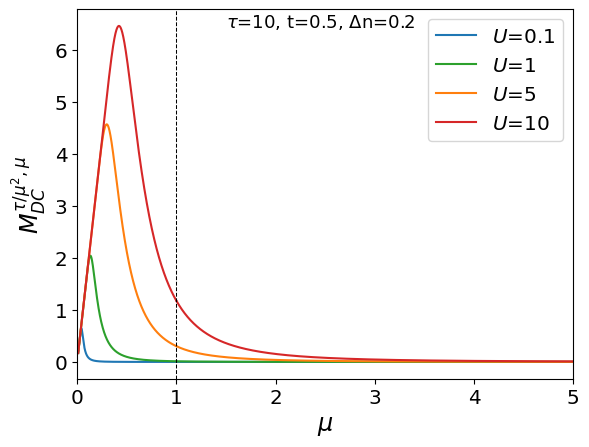

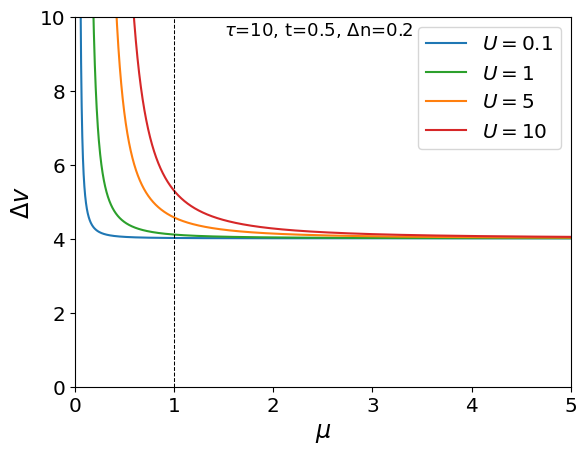

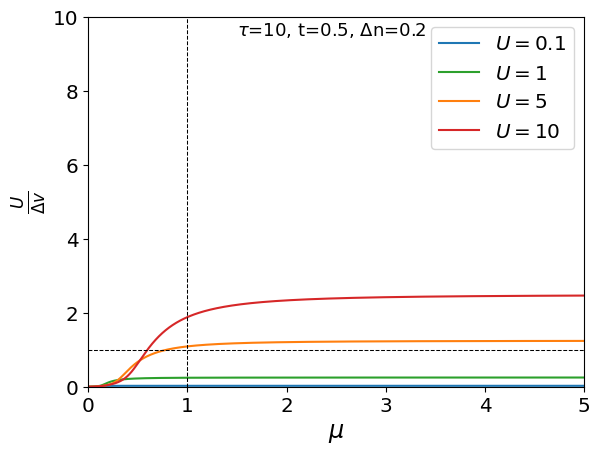

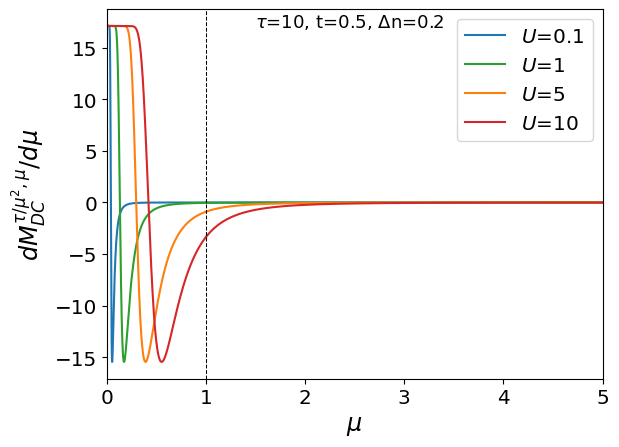

In [339]:
colors = ['tab:blue','tab:green','tab:orange','tab:red']

data = np.load('upside_down_data/data_tau='+str(tau)+'_t='+str(t)+'_dn='+str(target_dn)+'.npy',allow_pickle=True).item()

plotmus = data['mus']
ex_mus = data['ex_plotmus']
ex_Kc_mat = data['ex_Kcs']
Us = data['Us']
Kc_mat = data['Kcs']
all_Kc_mat = data['all_Kc']
mus = data['all_mus']
EDC_at_mu_mat = data['EDC_at_mu']
dvs_mat = data['dvs']

nACmus = len(plotmus)

for i,U in enumerate(Us):
    
    plt.plot(plotmus,Kc_mat[:,i],color=colors[i],label='$U$='+str(U))
    plt.plot(mus[nACmus:],all_Kc_mat[nACmus:,i],color=colors[i])

plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$M^{\\tau/\mu^2,\mu}_{DC}$')
plt.annotate('$\\tau$='+str(tau)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.savefig('upside_down_images/upside_down_tau='+str(tau)+'_t='+str(t)+'_dn='+str(target_dn)+'.png',bbox_inches='tight')
plt.show()
plt.close()

for i,U in enumerate(Us):
    plt.plot(mus,dvs_mat[:,i],color=colors[i],label='$U=$'+str(U))
    
plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$\Delta v$')
plt.annotate('$\\tau$='+str(tau)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.ylim((0,10))
plt.savefig('upside_down_images/upside_down_dv_tau='+str(tau)+'_t='+str(t)+'_dn='+str(target_dn)+'.png',bbox_inches='tight')
plt.show()
plt.close()

for i,U in enumerate(Us):
    plt.plot(mus,U/dvs_mat[:,i],color=colors[i],label='$U=$'+str(U))
    
plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.axhline(y=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$\\frac{U}{\Delta v}$')
plt.annotate('$\\tau$='+str(tau)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.ylim((0,10))
plt.savefig('upside_down_images/upside_down_U_over_dv_tau='+str(tau)+'_t='+str(t)+'_dn='+str(target_dn)+'.png',bbox_inches='tight')
plt.show()
plt.close()

for i,U in enumerate(Us):
    
    plt.plot(plotmus,np.gradient(Kc_mat[:,i],plotmus),color=colors[i],label='$U$='+str(U))
    plt.plot(mus[nACmus:],np.gradient(all_Kc_mat[nACmus:,i],mus[nACmus:]),color=colors[i])

plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$dM^{\\tau/\mu^2,\mu}_{DC}/d\mu$')
plt.annotate('$\\tau$='+str(tau)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.savefig('upside_down_images/upside_down_derivative_tau='+str(tau)+'_t='+str(t)+'_dn='+str(target_dn)+'.png',bbox_inches='tight')
plt.show()
plt.close()

### plot over varying delta_n

In [9]:
t = .5
U = 5
tau = 5
target_dns = [.01,.5,1,1.9]

lam1 = np.linspace(.0001,1,2000)
lam2 = np.linspace(1,4,1001)
lam3 = np.linspace(4,16,2001)
lam4 = np.linspace(16,10000,20001)
lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])

ntaus = len(target_dns)

for i,target_dn in enumerate(target_dns):
    if i==0:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,dvs = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
        Kc_mat = np.empty((len(Kcs),ntaus))
        ex_Kc_mat = np.empty((len(ex_Kcs),ntaus))
        
        all_Kc_mat = np.empty((len(all_Kcs),ntaus))
        
        EDC_at_mu_mat = np.empty((len(EDC_at_mu),ntaus))
        
        dvs_mat = np.empty((len(dvs),ntaus))
        
    else:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,dvs = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
    Kc_mat[:,i] = Kcs
    ex_Kc_mat[:,i] = ex_Kcs
    all_Kc_mat[:,i] = all_Kcs
    EDC_at_mu_mat[:,i] = EDC_at_mu
    dvs_mat[:,i] = dvs

100%|████████████████████████████████████| 25000/25000 [01:34<00:00, 263.69it/s]


In [10]:
data = {}
data['target_dns'] = target_dns
data['Kcs'] = Kc_mat
data['mus'] = plotmus
data['ex_Kcs'] = ex_Kc_mat
data['ex_plotmus'] = ex_mus
data['all_Kc'] = all_Kc_mat
data['all_mus'] = mus
data['EDC_at_mu'] = EDC_at_mu_mat
data['dvs'] = dvs_mat
np.save('upside_down_data/data_tau='+str(tau)+'_t='+str(t)+'_U='+str(U)+'.npy',data)

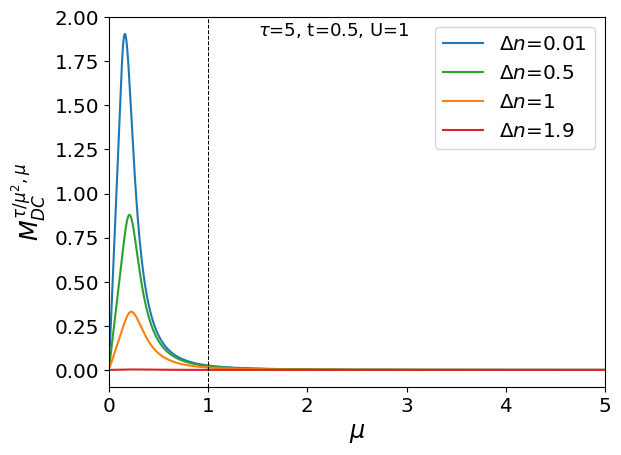

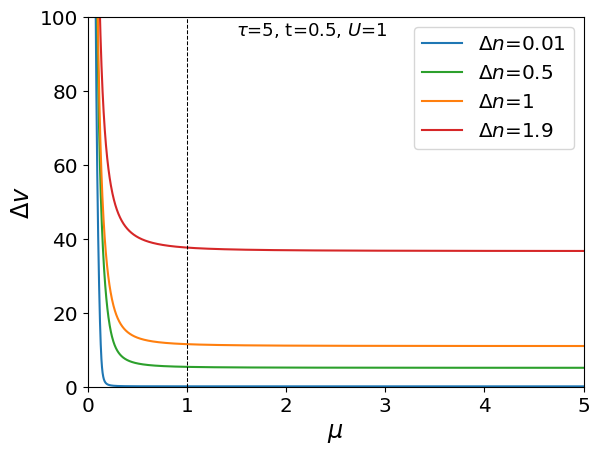

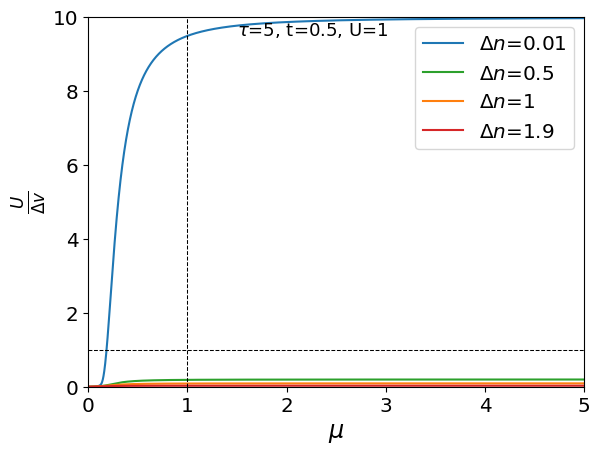

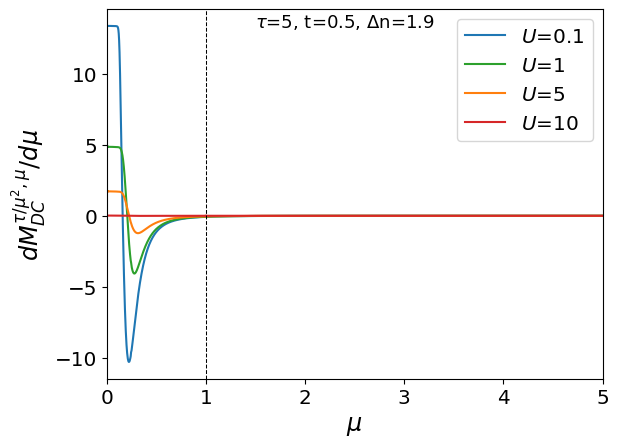

In [363]:
t = .5
U = 1
tau = 5

colors = ['tab:blue','tab:green','tab:orange','tab:red']

data = np.load('upside_down_data/data_tau='+str(tau)+'_t='+str(t)+'_U='+str(U)+'.npy',allow_pickle=True).item()

plotmus = data['mus']
ex_mus = data['ex_plotmus']
ex_Kc_mat = data['ex_Kcs']
target_dns = data['target_dns']
Kc_mat = data['Kcs']
all_Kc_mat = data['all_Kc']
mus = data['all_mus']
EDC_at_mu_mat = data['EDC_at_mu']
dvs_mat = data['dvs']

nACmus = len(plotmus)

for i,target_dn in enumerate(target_dns):
    
    plt.plot(plotmus,Kc_mat[:,i],color=colors[i],label='$\Delta n$='+str(target_dn))
    plt.plot(mus[nACmus:],all_Kc_mat[nACmus:,i],color=colors[i])

plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$M^{\\tau/\mu^2,\mu}_{DC}$')
plt.annotate('$\\tau$='+str(tau)+', t='+str(t)+', U='+str(U),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.savefig('upside_down_images/upside_down_tau='+str(tau)+'_t='+str(t)+'_U='+str(U)+'.png',bbox_inches='tight')
plt.show()
plt.close()

for i,target_dn in enumerate(target_dns):
    plt.plot(mus,dvs_mat[:,i],color=colors[i],label='$\Delta n$='+str(target_dn))
    
plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$\Delta v$')
plt.annotate('$\\tau$='+str(tau)+', t='+str(t)+', $U$='+str(U),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.ylim((0,100))
plt.savefig('upside_down_images/upside_down_dv_tau='+str(tau)+'_t='+str(t)+'_U='+str(U)+'.png',bbox_inches='tight')
plt.show()
plt.close()

for i,target_dn in enumerate(target_dns):
    plt.plot(mus,U/dvs_mat[:,i],color=colors[i],label='$\Delta n$='+str(target_dn))
    
plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.axhline(y=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$\\frac{U}{\Delta v}$')
plt.annotate('$\\tau$='+str(tau)+', t='+str(t)+', U='+str(U),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.ylim((0,10))
plt.savefig('upside_down_images/upside_down_U_over_dv_tau='+str(tau)+'_t='+str(t)+'_U='+str(U)+'.png',bbox_inches='tight')
plt.show()
plt.close()

for i,U in enumerate(Us):
    
    plt.plot(plotmus,np.gradient(Kc_mat[:,i],plotmus),color=colors[i],label='$U$='+str(U))
    plt.plot(mus[nACmus:],np.gradient(all_Kc_mat[nACmus:,i],mus[nACmus:]),color=colors[i])

plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$dM^{\\tau/\mu^2,\mu}_{DC}/d\mu$')
plt.annotate('$\\tau$='+str(tau)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,5))
plt.savefig('upside_down_images/upside_down_derivative_tau='+str(tau)+'_t='+str(t)+'_U='+str(U)+'.png',bbox_inches='tight')
plt.show()
plt.close()

# Thermal Upside Down Convergence Plots

Run my code for generating thermal upside down adiabtic connection computing the error at each step in mu as we draw closer to mu==0. maybe also do a plot as the density of the lambda grid increases. 

below I split my lambda range into 4 pieces, lam 1 controls all the mu values where mu > 1 which are necessary for computing each point along the upside down connection between 0 <= mu <= 1. Lam 2 through 4 are mu values that actually fall along the upside down AC integrand in mu space. Lam 1 needs to start from close to zero to get proper Kc values when extracting Kc from the right side up connection. 

In [71]:
print((1-.0001)/8000)
print((4-1)/2001)
print((16-4)/3001)
print((10000-16)/40001)

0.0001249875
0.0014992503748125937
0.003998667110963012
0.2495937601559961


In [3]:
t = .5
U = 1
tau = 1
target_dn = .2

lam1 = np.linspace(.1,1,800)
lam2 = np.linspace(1,4,201)
lam3 = np.linspace(4,16,301)
lam4 = np.linspace(16,10000,2001)
lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])


while True:
            
    Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,errored = Therm.Kcs(t,U,tau,target_dn,lambdas,error_check=True)
            
    if errored == True:
        print('defenintion in lam4 not great enough')
        lam4 = np.linspace(16,10000,2*len(lam4))
        lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])
    elif errored == False:
        break
    
np.save('Convergence_data/EDC_at_mu_t='+str(t)+'_U='+str(U)+'_tau='+str(tau)+'_dn='+str(target_dn)+'.npy',EDC_at_mu)

3.1622776601683795
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200


In [6]:
nACmus = len(plotmus)
    
EDC = simps(Kcs,plotmus)
    
print('EDC: ',EDC)
ex_EDC = simps(ex_Kcs,ex_mus)

##################### calc refrence properties#######################

lam = 10000
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-100000000000,100000000000)
eiglam,veclam = hub.hub_2site(lam*U,t,dv)

Vee_op = hub.hub_int_operator(U)
VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))

delta_vks = KS_Therm.find_dvks(t,[tau],[target_dn])
Ttaus = KS_Therm.Ts(t,tau,delta_vks)
Ss = KS_Therm.entropy(delta_vks,t,tau)

lam = 1
func = Therm.Thermal_dn_search_func_gen(lam*U,t,tau,target_dn)
dv = optimize.bisect(func,-100,100,xtol=2e-12)
Vext = Therm.Expectation(U,t,dv/2,-dv/2,U/2,[tau],operator='ext_potential')

calc_A = EDC+VSC+Vext+(Ttaus-tau*Ss)
calc_ex_A = calc_A+ex_EDC
print('energy before decorrelation: ',VSC+Vext+(Ttaus-tau*Ss))
print('calc free energy:',calc_A)
print('calc free energy + extrapolation:',calc_A+ex_EDC)

############### calc exact energy #############################
_,_,A = Therm.Thermal_2particle_Hubbard(U,t,dv,[tau])
print('true free energy:',A)
error = A[0]-calc_ex_A[0]
print()

print('error:',error)
#plt.savefig('upside_down_images/upside_down_error_U=1_t=0.5_dn=.2.png')
plt.show()

EDC:  0.32575489976847766
energy before decorrelation:  [-2.82955034]
calc free energy: [-2.50379544]
calc free energy + extrapolation: [-2.5037116]
true free energy: [-2.48034693]

error: 0.023364661999982772


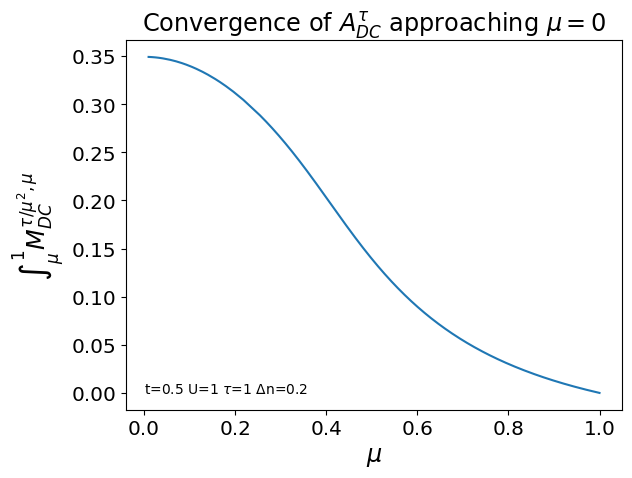

In [56]:
plt.plot(plotmus,EDC_at_mu)
plt.xlabel('$\mu$')
plt.ylabel('$\int_\mu^1 M_{DC}^{\\tau/\mu^2,\mu}$')
plt.title('Convergence of $A^\\tau_{DC}$ approaching $\mu=0$')
plt.annotate('t='+str(t)+' U='+str(U)+' $\\tau$='+str(tau)+' $\Delta$n='+str(target_dn),(0,0))
plt.savefig('Convergence_data/EDC_at_mu_t='+str(t)+'_U='+str(U)+'_tau='+str(tau)+'_dn='+str(target_dn)+'.png',bbox_inches='tight')
plt.show()

The decorrelation energy of the system looks properly converged by the time that we reach the min mu value in the plot which is mu=.01 or where lam=10,000

In [17]:
t = .5
U = 1
tau = 1
low_lams = np.linspace(.1,.0001,10)
target_dn = .2

EDC_at_low_lam = []

for low_lam in low_lams:

    lam1 = np.linspace(low_lam,1,1000)
    lam2 = np.linspace(1,4,201)
    lam3 = np.linspace(4,16,301)
    lam4 = np.linspace(16,10000,2001)
    lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])


    while True:
            
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,errored = Therm.Kcs(t,U,tau,target_dn,lambdas,error_check=True)
        
        EDC_at_low_lam.append(simps(Kcs,plotmus))
            
        if errored == True:
            print('defenintion in lam4 not great enough')
            lam4 = np.linspace(16,10000,2*len(lam4))
            lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])
        elif errored == False:
            break

3.1622776601683795
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3.353892354527688
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3.585173696910373
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3.8720154633118313
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
4.2409446483998545
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
4.740454631399772
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1

In [39]:
##################### calc refrence properties######################
lam = 10000
func = hub.dn_search_func_gen(lam*U,t,target_dn)
dv = optimize.bisect(func,-100000000000,100000000000)
eiglam,veclam = hub.hub_2site(lam*U,t,dv)

Vee_op = hub.hub_int_operator(U)
VSC = np.dot(veclam.T,np.dot(Vee_op,veclam))

delta_vks = KS_Therm.find_dvks(t,[tau],[target_dn])
Ttaus = KS_Therm.Ts(t,tau,delta_vks)
Ss = KS_Therm.entropy(delta_vks,t,tau)

lam = 1
func = Therm.Thermal_dn_search_func_gen(lam*U,t,tau,target_dn)
dv = optimize.bisect(func,-100,100,xtol=2e-12)
Vext = Therm.Expectation(U,t,dv/2,-dv/2,U/2,[tau],operator='ext_potential')

############### calc exact energy #############################
_,_,A = Therm.Thermal_2particle_Hubbard(U,t,dv,[tau])

true_EDC = A-VSC-Vext-(Ttaus-tau*Ss)
true_EDC = true_EDC[0]

print('true free energy:',A)
print()
print('true EDC:',true_EDC)
print()

true free energy: [-2.48034693]

true EDC: 0.34920340340878697



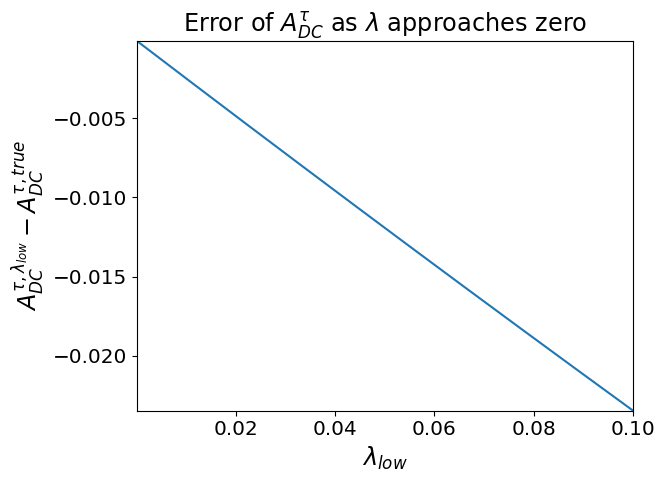

[-0.0234485  -0.02091421 -0.01836601 -0.01580392 -0.01322792 -0.01063801
 -0.0080342  -0.00541647 -0.00278483 -0.00013928]


In [61]:
plt.plot(low_lams,EDC_at_low_lam-true_EDC)
plt.xlim((low_lams[-1],low_lams[0]))
plt.ylim((min(EDC_at_low_lam-true_EDC),max(EDC_at_low_lam-true_EDC)))
plt.xlabel('$\lambda_{low}$')
plt.ylabel('$A_{DC}^{\\tau,\lambda_{low}}-A_{DC}^{\\tau,true}$')
plt.title('Error of $A^\\tau_{DC}$ as $\lambda$ approaches zero')
plt.annotate('t='+str(t)+' U='+str(U)+' $\\tau$='+str(tau)+' $\Delta$n='+str(target_dn),(0,0))
plt.savefig('Convergence_data/EDC_at_low_lam_t='+str(t)+'_U='+str(U)+'_tau='+str(tau)+'_dn='+str(target_dn)+'.png',bbox_inches='tight')
plt.show()
print(EDC_at_low_lam-true_EDC)

As lam goes to zero is important to the total decorrelation energy, we demonstrate this that as we take lam closer to zero E_DC becomes more correct and not by an insignificant amount. This demonstates that the strictly correlated and non-interacting limit are intrinsically connected. To obtain milliHartree error it is necessary to start at .0001 for lambda or less. Which isn't much of an issue because computing from 0 to 1 is fast for the extraction of the upside down AC from the right side up.

In [32]:
np.save('Convergence_data/EDC_at_low_lam_t='+str(t)+'_U='+str(U)+'_tau='+str(tau)+'_dn='+str(target_dn)+'.npy',EDC_at_low_lam)

# Weird ADC vs U/dv at mu=1 plot

There are multiple plots here to make. I select a U value and vary over dv, or I select dv and vary over U. I could also plot dn on the right axis for either case.

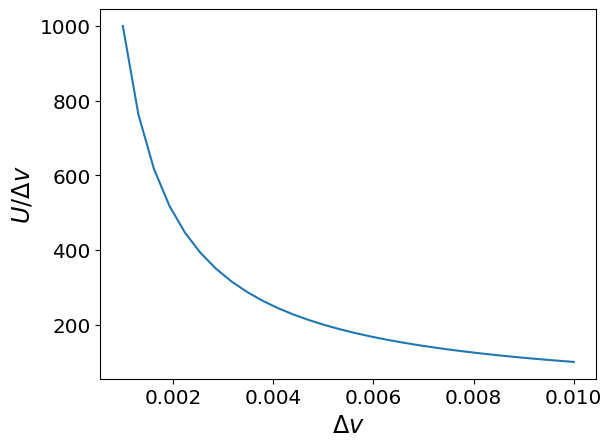

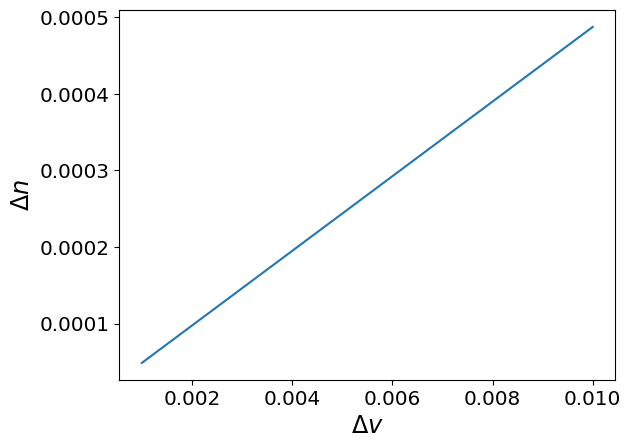

In [69]:
lam1 = np.linspace(.001,1,1000)
lam2 = np.linspace(1,4,1501)
lam3 = np.linspace(4,16,3001)
lam4 = np.linspace(16,10000,2001)
lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])


t = .5
tau = 10
U = 1

dvs_at_mu_0 = np.linspace(.001,.01,30)
plt.plot(dvs_at_mu_0,U/dvs_at_mu_0)
plt.xlabel('$\Delta v$')
plt.ylabel('$U/ \Delta v$')
plt.show()
plt.close()
delta_ns = Therm.Thermal_2particle_Hubbard_deltan_dvs(U,t,dvs_at_mu_0,[tau])
delta_ns = delta_ns[0,:]
plt.plot(dvs_at_mu_0,delta_ns)
plt.xlabel('$\Delta v$')
plt.ylabel('$\Delta n$')
plt.show()

In [75]:
ndns = len(delta_ns)

for i,target_dn in enumerate(delta_ns):
    clear_output(wait=True)
    print('iteration=',i)
    if i==0:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,dvs = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
        Kc_mat = np.empty((len(Kcs),ndns))
        ex_Kc_mat = np.empty((len(ex_Kcs),ndns))
        
        all_Kc_mat = np.empty((len(all_Kcs),ndns))
        
        EDC_at_mu_mat = np.empty((len(EDC_at_mu),ndns))
        
        dvs_mat = np.empty((len(dvs),ndns))
        
    else:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,dvs = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
    Kc_mat[:,i] = Kcs
    ex_Kc_mat[:,i] = ex_Kcs
    all_Kc_mat[:,i] = all_Kcs
    EDC_at_mu_mat[:,i] = EDC_at_mu
    dvs_mat[:,i] = dvs

iteration= 29


100%|██████████████████████████████████████| 7500/7500 [00:15<00:00, 474.72it/s]


In [76]:
ADCs = np.empty(ndns)

for i in range(ndns):
    ADCs[i] = simps(Kc_mat[:,i],plotmus)

In [77]:
data = {}
data['Kcs'] = Kc_mat
data['mus'] = plotmus
data['ex_Kcs'] = ex_Kc_mat
data['ex_plotmus'] = ex_mus
data['all_Kc'] = all_Kc_mat
data['all_mus'] = mus
data['EDC_at_mu'] = EDC_at_mu_mat
data['dvs'] = dvs_mat
data['dvs_at_mu_0'] = dvs_at_mu_0
data['ADCs'] = ADCs
np.save('upside_down_data/dv_at_mu_0_tiny_dv_U='+str(U)+'_t='+str(t)+'_tau='+str(tau)+'.npy',data)

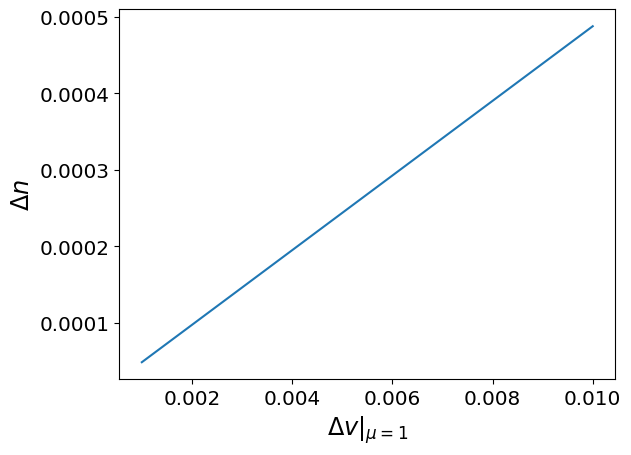

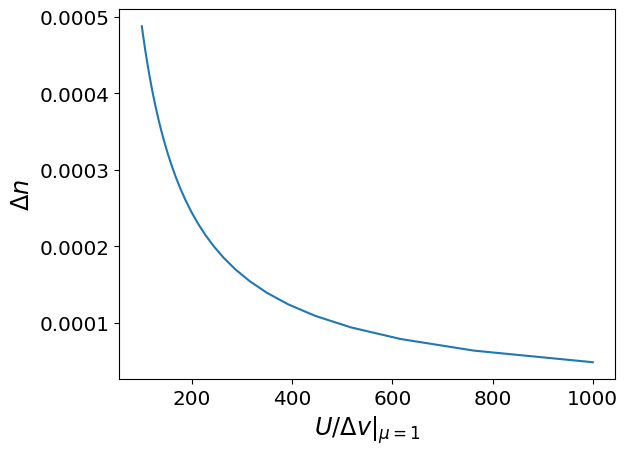

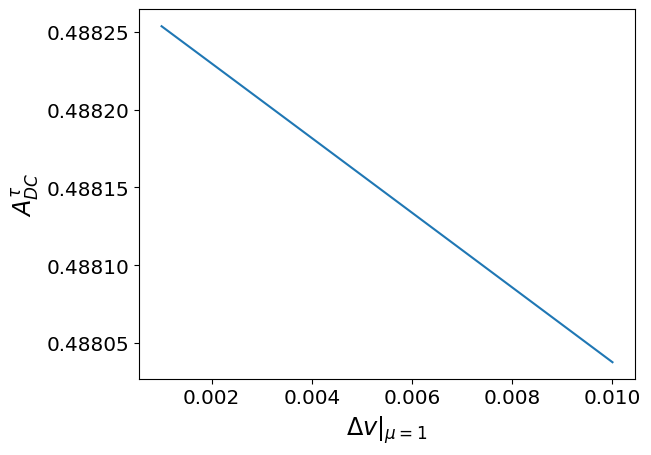

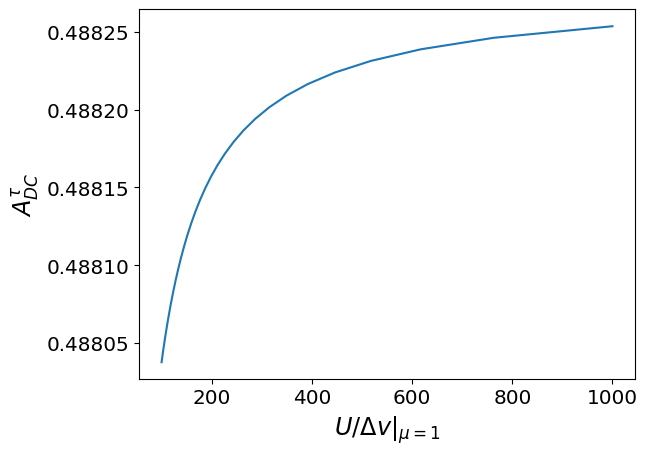

In [78]:
plt.plot(dvs_at_mu_0,delta_ns)
plt.xlabel('$\Delta v |_{\mu=1}$')
plt.ylabel('$\Delta n$')
plt.show()
plt.plot(U/dvs_at_mu_0,delta_ns)
plt.xlabel('$U/\Delta v|_{\mu=1}$')
plt.ylabel('$\Delta n$')
plt.show()
plt.plot(dvs_at_mu_0,ADCs)
plt.xlabel('$\Delta v|_{\mu=1}$')
plt.ylabel('$A_{DC}^\\tau$')
#plt.savefig('upside_down_images/ADC_vs_dv',bbox_inches='tight')
plt.show()
plt.plot(U/dvs_at_mu_0,ADCs)
plt.xlabel('$U/\Delta v|_{\mu=1}$')
plt.ylabel('$A_{DC}^\\tau$')
#plt.savefig('upside_down_images/ADC_vs_U_over_dv',bbox_inches='tight')
plt.show()

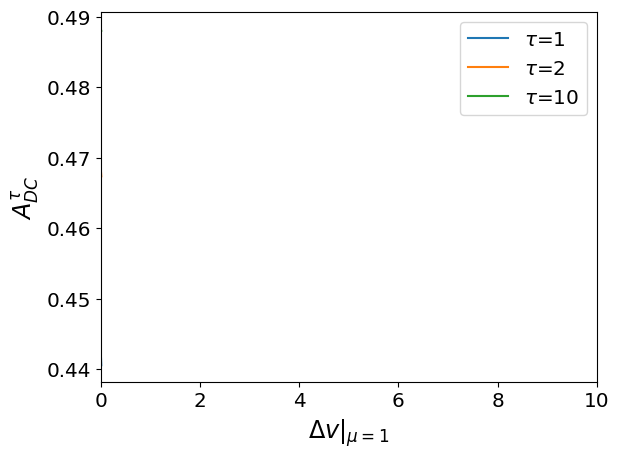

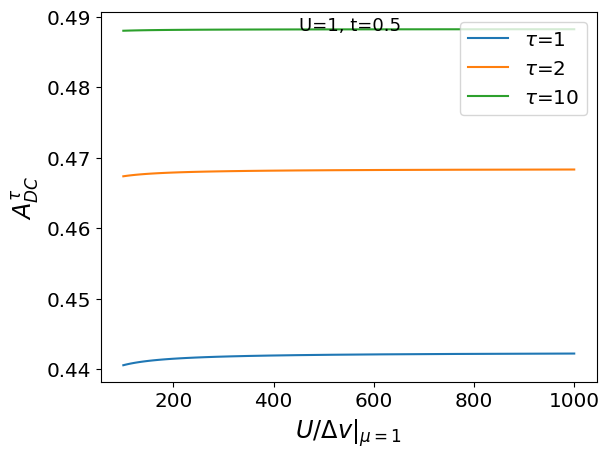

In [80]:
t = .5
taus = [1,2,10]
U = 1

colors = ['tab:blue','tab:green','tab:orange','tab:red']

for i,tau in enumerate(taus):
    data = np.load('upside_down_data/dv_at_mu_0_tiny_dv_U='+str(U)+'_t='+str(t)+'_tau='+str(tau)+'.npy',allow_pickle=True).item()
    plt.plot(data['dvs_at_mu_0'],data['ADCs'],label='$\\tau$='+str(tau))
plt.legend()
plt.xlabel('$\Delta v|_{\mu=1}$')
plt.ylabel('$A_{DC}^\\tau$')
plt.xlim((0,10))
#plt.savefig('upside_down_images/ADC_vs_dv_at_mu_1_U=1_t=.5.png',bbox_inches='tight')
plt.show()

for i,tau in enumerate(taus):
    data = np.load('upside_down_data/dv_at_mu_0_tiny_dv_U='+str(U)+'_t='+str(t)+'_tau='+str(tau)+'.npy',allow_pickle=True).item()
    plt.plot(U/data['dvs_at_mu_0'],data['ADCs'],label='$\\tau$='+str(tau))
plt.legend()
plt.xlabel('$U/\Delta v|_{\mu=1}$')
plt.ylabel('$A_{DC}^\\tau$')
plt.annotate('U='+str(U)+', t='+str(t),xy=(0.4,0.95),xycoords='axes fraction',fontsize=13)
#plt.savefig('upside_down_images/ADC_vs_U_over_dv_at_mu_1_U=1_t=.5.png',bbox_inches='tight')
plt.show()

# Weird plots from data generated on pinnacles

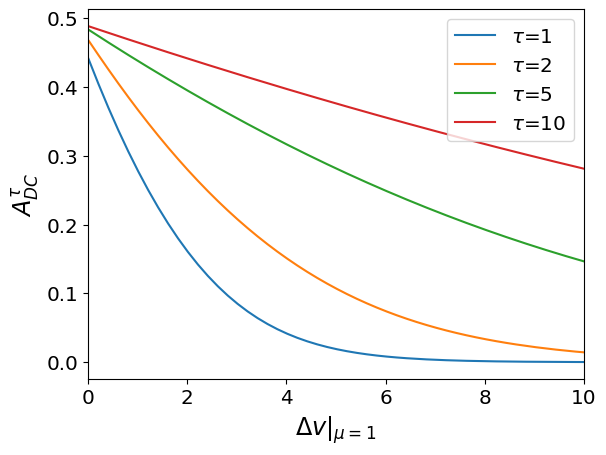

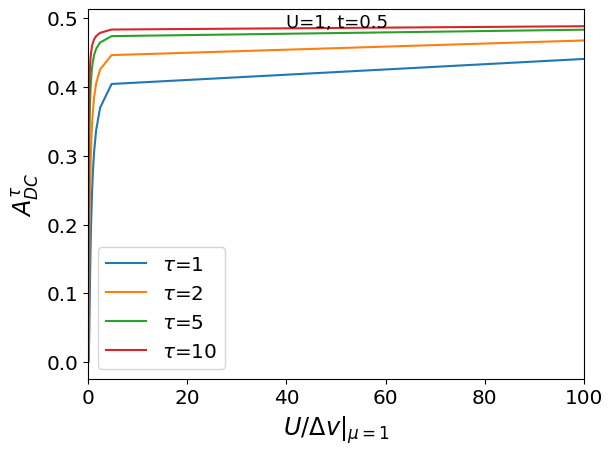

In [45]:
t = .5
taus = [1,2,5,10]
U = 1

colors = ['tab:blue','tab:green','tab:orange','tab:red']

for i,tau in enumerate(taus):
    data = np.load('data/dv_at_mu_0_U='+str(U)+'_t='+str(t)+'_tau='+str(tau)+'.npy',allow_pickle=True).item()
    plt.plot(data['dvs_at_mu_0'],data['ADCs'],label='$\\tau$='+str(tau))
plt.legend()
plt.xlabel('$\Delta v|_{\mu=1}$')
plt.ylabel('$A_{DC}^\\tau$')
plt.xlim((0,10))
#plt.savefig('upside_down_images/ADC_vs_dv_at_mu_1_U=1_t=.5.png',bbox_inches='tight')
plt.show()

for i,tau in enumerate(taus):
    data = np.load('data/dv_at_mu_0_U='+str(U)+'_t='+str(t)+'_tau='+str(tau)+'.npy',allow_pickle=True).item()
    plt.plot(U/data['dvs_at_mu_0'],data['ADCs'],label='$\\tau$='+str(tau))
plt.legend()
plt.xlabel('$U/\Delta v|_{\mu=1}$')
plt.ylabel('$A_{DC}^\\tau$')
plt.annotate('U='+str(U)+', t='+str(t),xy=(0.4,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((0,100))
#plt.savefig('upside_down_images/ADC_vs_U_over_dv_at_mu_1_U=1_t=.5.png',bbox_inches='tight')
plt.show()

# Check in the intergral from zero to infinity is the same 

## I want to load all of the integrand data for a system of fixed dn and integrate acroos tohe whole range

In [89]:
t = .5
U = 1
taus = [.1,1,5,10]
target_dn = .2

low_lams = np.linspace(.1,.000001,10)

inf_integrals = np.empty((len(low_lams),len(taus)))

ntaus = len(taus)

for j,low_lam in enumerate(low_lams):
    print('iteration=',j)
    
    clear_output(wait=True)

    lam1 = np.linspace(low_lam,1,2000)
    lam2 = np.linspace(1,4,1501)
    lam3 = np.linspace(4,16,2001)
    lam4 = np.linspace(16,10000,2001)
    lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])

    for i,tau in enumerate(taus):
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,dvs = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
        integral = simps(all_Kcs,mus)
        
        inf_integrals[j,i] = integral

100%|██████████████████████████████████████| 7500/7500 [00:16<00:00, 456.72it/s]


In [90]:
np.save('upside_down_data/integral_towards_inf_t=_'+str(t)+'U=_'+str(U)+'dn='+str(target_dn),inf_integrals)

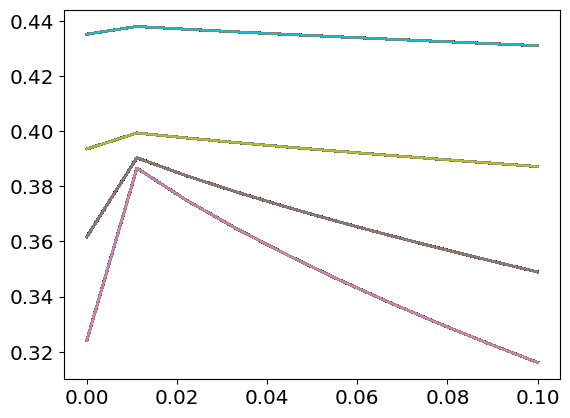

In [180]:
for i,tau in enumerate(taus):
    
    plt.plot(low_lams,inf_integrals,label='$\\tau$='+str(tau))
    
#plt.legend()
plt.show()

## Maybe I look for the first value close to the limiting value and integrate to there

In [325]:
t = .5
U = 1
taus = [.1,1,5,10]
target_dn = .2

lam1 = np.linspace(.0000001,1,8000)
lam2 = np.linspace(1,4,3001)
lam3 = np.linspace(4,16,4001)
lam4 = np.linspace(16,10000,4001)
lambdas = np.append(np.append(np.append(lam1,lam2[1:]),lam3[1:]),lam4[1:])

ntaus = len(taus)

for i,tau in enumerate(taus):
    if i==0:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,dvs = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
        Kc_mat = np.empty((len(Kcs),ntaus))
        ex_Kc_mat = np.empty((len(ex_Kcs),ntaus))
        
        all_Kc_mat = np.empty((len(all_Kcs),ntaus))
        
        EDC_at_mu_mat = np.empty((len(EDC_at_mu),ntaus))
        
        dvs_mat = np.empty((len(dvs),ntaus))
        
    else:
        Kcs,plotmus,ex_Kcs,ex_mus,all_Kcs,mus,EDC_at_mu,dvs = Therm.Kcs(t,U,tau,target_dn,lambdas)
        
    Kc_mat[:,i] = Kcs
    ex_Kc_mat[:,i] = ex_Kcs
    all_Kc_mat[:,i] = all_Kcs
    EDC_at_mu_mat[:,i] = EDC_at_mu
    dvs_mat[:,i] = dvs

100%|████████████████████████████████████| 19000/19000 [00:39<00:00, 482.69it/s]


18996
0.34997778331433316
18994
0.37608402778616873
18984
0.4004611545013984
18976
0.4215273259024055


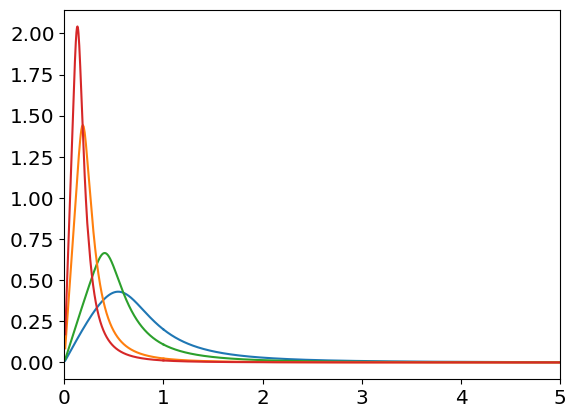

In [327]:
thresh = .000002

nACmus = len(plotmus)

for i,tau in enumerate(taus):
    
    whr = np.argmax(all_Kc_mat[:,i] < thresh)
    print(whr)
    plt.plot(plotmus,Kc_mat[:,i],color=colors[i],label='$\\tau$='+str(tau))
    plt.plot(mus[nACmus:],all_Kc_mat[nACmus:,i],color=colors[i])
    plt.scatter(x=mus[whr], y=thresh)
    #test = simps(all_Kc_mat[:whr+1,i],mus[:whr+1])
    test = simps(all_Kc_mat[:,i],mus)
    print(test)

plt.xlim((0,5))
#plt.ylim((0,.00003))
plt.show()

I was wrong or a numerical demonstration is fraught. either way, moving on.

# plotting dv at mu=1 as the temp of the system is varied with fixed dn

In [177]:
Us = [1,5,10]
t = .5
taus = np.linspace(.01,10,1000)
target_dn = .2
dvs = np.empty((len(taus),len(Us)))

for j,U in enumerate(Us):
    print(j)
    dv_guess = -float(KS_Therm.find_dvks(t,[taus[0]],[target_dn]))
    print(dv_guess)
    for i,tau in enumerate(taus):
        func = Therm.Thermal_dn_search_func_gen(U,t,tau,target_dn)
        dv_guess = optimize.newton(func,dv_guess,maxiter=100)
    
        dvs[i,j] = dv_guess

0
0.10050378152612893
1
0.10050378152612893
2
0.10050378152612893


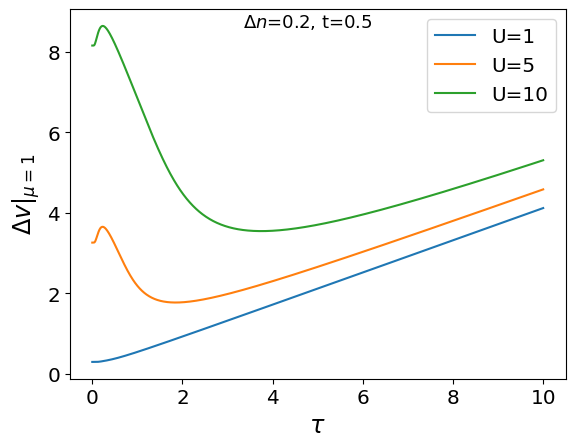

In [169]:
for i,U in enumerate(Us):
    plt.plot(taus,dvs[:,i],label='U='+str(U))
plt.legend()
plt.xlabel('$\\tau$')
plt.ylabel('$\Delta v|_{\mu=1}$')
plt.annotate('$\Delta n$='+str(target_dn)+', t='+str(t),xy=(0.35,0.95),xycoords='axes fraction',fontsize=13)
plt.show()

# Looking at the kentropic correlation as on increases the on-site interaction parmater U for multiple differnet values of temperature

In [306]:
ttaus = [.1,1,5,10]
taulist = np.array([])
dtau = 1e-4
steps = np.arange(7)
nsteps = np.flip(steps)
tauis = np.array([])

for i,tau in enumerate(ttaus):
    for j in nsteps:
        taulist = np.append(taulist,tau-j*dtau)
        if j == 6:
            tauis = np.append(tauis,j*(i+1)+(i*7))
    for j in steps[1:]:
        taulist = np.append(taulist,tau+j*dtau)
        
tauis = tauis.astype(int)

In [307]:
Us = np.linspace(0.01,20,50)
t = 1/2
taus = taulist
ntau = len(taus)
nUs = len(Us)
target_dn = .2

Ss = np.empty(ntau)
Ts = np.empty(ntau)

dvs = np.empty((nUs,ntau))

Zgs = np.empty((nUs,ntau))
Oms = np.empty((nUs,ntau))
As = np.empty((nUs,ntau))

Entropy = np.empty((nUs,ntau))
Kinetic = np.empty((nUs,ntau))

for i,tau in enumerate(taus):
    print(tau)
    dv_guess = -float(KS_Therm.find_dvks(t,[tau],[target_dn]))
    
    Ss[i] = KS_Therm.entropy(dv_guess,t,tau)
    Ts[i] = KS_Therm.Ts(t,tau,dv_guess)
    
    for j,U in enumerate(Us):
        
        func = Therm.Thermal_dn_search_func_gen(U,t,tau,target_dn)
        dv_guess = optimize.newton(func,dv_guess,maxiter=100)
        dvs[j,i] = dv_guess
        
        Zgs[j,i],Oms[j,i],As[j,i] = Therm.Thermal_2particle_Hubbard_dvs(U,t,[dv_guess],[tau])
        Kinetic[j,i] = Therm.Thermal_2particle_Hubbard_kinetic_dvs(U,t,[dv_guess],[tau])

for i,U in enumerate(Us):
    Entropy[i,:] = -np.gradient(Oms[i,:],taus)

print('done')

0.0994
0.0995
0.09960000000000001
0.09970000000000001
0.0998
0.0999
0.1
0.10010000000000001
0.10020000000000001
0.1003
0.1004
0.1005
0.10060000000000001
0.9994
0.9995
0.9996
0.9997
0.9998
0.9999
1.0
1.0001
1.0002
1.0003
1.0004
1.0005
1.0006
4.9994
4.9995
4.9996
4.9997
4.9998
4.9999
5.0
5.0001
5.0002
5.0003
5.0004
5.0005
5.0006
9.9994
9.9995
9.9996
9.9997
9.9998
9.9999
10.0
10.0001
10.0002
10.0003
10.0004
10.0005
10.0006
done


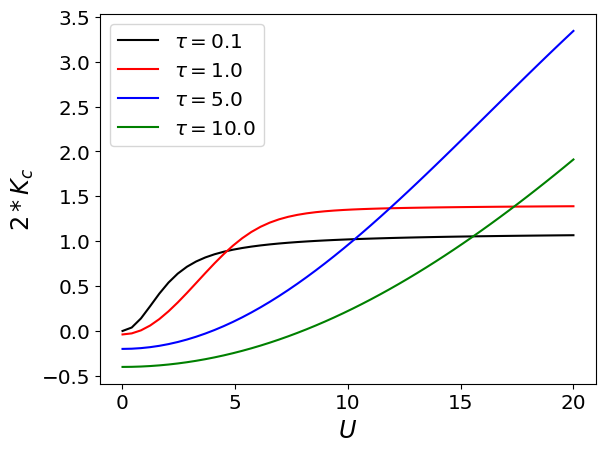

In [308]:
#iss = [0,int(ntau/8),int(ntau/4),int(ntau/2),ntau-1]
colors = ['black','red','blue','green','purple']

j=0
for i in tauis:
    plt.plot(Us,2*(Kinetic[:,i]-Ts[i])-taus[i]*(Entropy[:,i]-Ss[i]),label='$\\tau=$'+str(taus[i]),color=colors[j])
    j+=1
plt.legend()
#plt.xlim((10,12))
plt.ylabel('$2*K_c$')
plt.xlabel('$U$')
#plt.ylim(0,0.2)
plt.show()

can Kentropic correlation be negative? Is this plot wrong or my assumption that the limit at mu=1 is 2*Kc?

It displays crossings at the right points roughly

ADC: 0.530968981002205
integral to $\mu$=5: 4.143742252421529
ADC: 0.9324675482986795
integral to $\mu$=5: 4.0995255336018275
ADC: 2.8869276454817703
integral to $\mu$=5: 4.060786822712146
ADC: 3.445531088919049
integral to $\mu$=5: 4.054700116935747


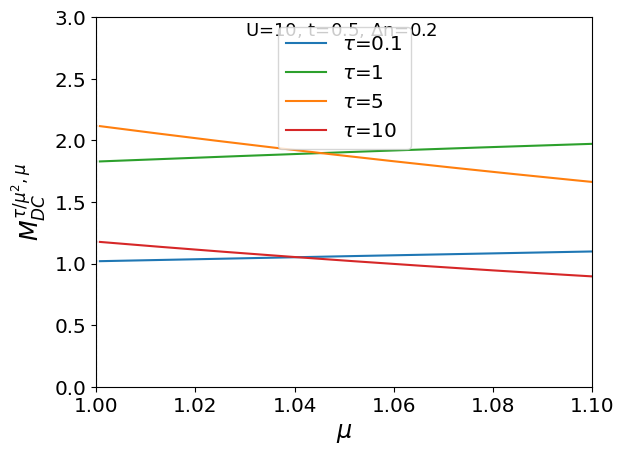

In [296]:
t = .5
U = 10
taus = [.1,1,5,10]
target_dn = .2

colors = ['tab:blue','tab:green','tab:orange','tab:red']

data = np.load('upside_down_data/data_U='+str(U)+'_t='+str(t)+'_dn='+str(target_dn)+'.npy',allow_pickle=True).item()

plotmus = data['mus']
ex_mus = data['ex_plotmus']
ex_Kc_mat = data['ex_Kcs']
taus = data['taus']
Kc_mat = data['Kcs']
all_Kc_mat = data['all_Kc']
mus = data['all_mus']
EDC_at_mu_mat = data['EDC_at_mu']
dvs_mat = data['dvs']

nACmus = len(plotmus)

for i,tau in enumerate(taus):
    
    plt.plot(plotmus,Kc_mat[:,i],color=colors[i],label='$\\tau$='+str(tau))
    ADC = simps(Kc_mat[:,i],plotmus)
    print('ADC:',ADC)
    plt.plot(mus[nACmus:],all_Kc_mat[nACmus:,i],color=colors[i])
    ADCextra = simps(all_Kc_mat[nACmus:,i],mus[nACmus:])
    print('integral to $\mu$=5:',ADC+ADCextra)

plt.axvline(x=1.0,color='black',linestyle='--',linewidth=.75)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$M^{\\tau/\mu^2,\mu}_{DC}$')
plt.annotate('U='+str(U)+', t='+str(t)+', $\Delta$n='+str(target_dn),xy=(0.3,0.95),xycoords='axes fraction',fontsize=13)
plt.xlim((1,1.1))
plt.ylim((0,3))
plt.show()
plt.close()